In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# 1. Importando os datasets

Temos dois arquivos que precisamos usar nesta competição: test.csv and train.csv.

In [2]:
# Definindo o caminho da pasta
input_path = '/kaggle/input/titanic/'

# Carregando os datasets
train_data = pd.read_csv(input_path + 'train.csv')
test_data = pd.read_csv(input_path + 'test.csv')
gender_submission = pd.read_csv(input_path + 'gender_submission.csv')

# Visualizando as primeiras linhas dos arquivos para conferir
print("Treino carregado com sucesso!")
display(train_data.head())
print("Teste carregado com sucesso!")
display(test_data.head())
print("Exemplo de submissão carregado com sucesso!")
display(gender_submission.head())

# Verificando as dimensões de cada dataset
print(f"Shape do Treino: {train_data.shape}")
print(f"Shape do Teste:  {test_data.shape}")

Treino carregado com sucesso!


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Teste carregado com sucesso!


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Exemplo de submissão carregado com sucesso!


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Shape do Treino: (891, 12)
Shape do Teste:  (418, 11)


In [3]:
print("Verificando colunas do treino:\n")
train_data.info()
train_data.columns

print("\n")
print("=" * 60)
print("\n")

print("Verificando colunas do teste:\n")
test_data.info()
test_data.columns

Verificando colunas do treino:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB




Verificando colunas do teste:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ------------

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# Mostra a contagem de valores nulos por coluna
print("Verificando valores nulos do treino:\n")
print(train_data.isnull().sum())
print("\n")
print("Verificando valores nulos do teste:\n")
print(test_data.isnull().sum())

Verificando valores nulos do treino:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Verificando valores nulos do teste:

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [5]:
# Calculando a porcentagem de valores nulos
null_pct = (train_data.isnull().sum() / len(train_data)) * 100

# Criando um DataFrame para facilitar a leitura
null_df = pd.DataFrame({
    'Coluna': train_data.columns,
    'Nulos (Absoluto)': train_data.isnull().sum(),
    'Nulos (%)': null_pct.round(2) # Arredondando para 2 casas decimais
})

# Ordenando para ver os maiores problemas primeiro
print(null_df.sort_values(by='Nulos (%)', ascending=False))

# Não devemos alterar os valores do teste, por isso não iremos nos aprofundar nos dados nulos do dataset

                  Coluna  Nulos (Absoluto)  Nulos (%)
Cabin              Cabin               687      77.10
Age                  Age               177      19.87
Embarked        Embarked                 2       0.22
PassengerId  PassengerId                 0       0.00
Name                Name                 0       0.00
Pclass            Pclass                 0       0.00
Survived        Survived                 0       0.00
Sex                  Sex                 0       0.00
Parch              Parch                 0       0.00
SibSp              SibSp                 0       0.00
Fare                Fare                 0       0.00
Ticket            Ticket                 0       0.00


## 1.1 Separando colunas em numéricas e categóricas

Vamos separar as colunas baseado no tipo de dado e na utilidade delas para o modelo.

No Titanic, nem toda coluna é útil. Por exemplo, **PassengerId**, **Name** e **Ticket** são identificadores únicos que tendem a confundir o modelo (*overfitting*).

Precisamos focar no que realmente importa.

In [6]:
# Agora precisamos separar as colunas em dados categóricos e numéricos
# 1. Definimos o Alvo (Target)
y = train_data.Survived

# 2. Selecionamos as colunas que vamos usar (Features)
# Removemos Survived (alvo) e as colunas de texto único/ID
cols_to_use = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_data[cols_to_use]

# 3. Separamos por tipo
# Colunas Categóricas: Geralmente tipo 'object' e com poucos valores únicos (baixa cardinalidade)
categorical_cols = [cname for cname in X.columns if 
                    X[cname].dtype == "object" and
                    X[cname].nunique() < 10]

# Colunas Numéricas: tipo 'int64' ou 'float64'
numerical_cols = [cname for cname in X.columns if 
                  X[cname].dtype in ['int64', 'float64']]

print(f"Colunas Numéricas: {numerical_cols}")
print(f"Colunas Categóricas: {categorical_cols}")

Colunas Numéricas: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Colunas Categóricas: ['Sex', 'Embarked']


### Por que separamos assim?

**Cardinalidade**: No código acima, adicionamos uma regra X[cname].nunique() < 10. Isso serve para evitar colunas de texto com nomes demais. Se uma coluna categórica tiver 500 nomes diferentes, o OneHotEncoder criaria 500 colunas novas, o que tornaria o modelo lento e impreciso.

**Limpeza Automática**: Ao definir cols_to_use, já deixamos de fora o PassengerId e o Name, que não ajudam a prever a sobrevivência de forma genérica.

In [7]:
# 1. Definimos todas as colunas disponíveis originalmente
all_columns = train_data.columns.tolist()

# 2. Definimos as que selecionamos
selected_columns = numerical_cols + categorical_cols + ['Survived']

# 3. Identificamos as excluídas usando List Comprehension
excluded_cols = [col for col in all_columns if col not in selected_columns]

# --- Exibição Didática ---
print("✅ COLUNAS SELECIONADAS:")
print(f"Numéricas: {numerical_cols}")
print(f"Categóricas: {categorical_cols}")

print("\n❌ COLUNAS EXCLUÍDAS:")
for col in excluded_cols:
    # Vamos adicionar o motivo da exclusão para ficar mais claro
    reason = "Identificador/Texto único (Alta Cardinalidade)" if col in ['PassengerId', 'Name', 'Ticket', 'Cabin'] else "Outro"
    print(f"- {col}: {reason}")

✅ COLUNAS SELECIONADAS:
Numéricas: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categóricas: ['Sex', 'Embarked']

❌ COLUNAS EXCLUÍDAS:
- PassengerId: Identificador/Texto único (Alta Cardinalidade)
- Name: Identificador/Texto único (Alta Cardinalidade)
- Ticket: Identificador/Texto único (Alta Cardinalidade)
- Cabin: Identificador/Texto único (Alta Cardinalidade)


### Por que essas colunas foram excluídas?

No Titanic, a exclusão dessas colunas específicas faz muito sentido para nosso Pipeline:

- **PassengerId**: É apenas um número sequencial. O modelo pode achar que "quem tem ID maior sobrevive mais" por pura coincidência (correlação espúria).
- **Name**: Cada nome é único. A menos que façamos uma técnica avançada para extrair títulos (como Mr., Miss, Dr.), o modelo não consegue aprender nada com nomes individuais.
- **Ticket**: Números de tickets variam muito e não têm um padrão matemático óbvio.
- **Cabin**: Como vimos, tem 77% de nulos. Manter essa coluna sem um tratamento especial geralmente "suja" o modelo.

# 2. Definição dos Pipelines

## 2.1 Pipeline Simples (O "Rápido e Prático")

**Foco**: Rapidez e simplicidade. Usa um modelo robusto que não exige escalonamento de dados.

**Imputação**: Preenche com constantes.

**Modelo**: RandomForestRegressor (ou Classifier).

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Preprocessamento básico
simple_num = SimpleImputer(strategy='mean')
simple_cat = OneHotEncoder(handle_unknown='ignore')

preprocessor_simple = ColumnTransformer(transformers=[
    ('num', simple_num, numerical_cols),
    ('cat', simple_cat, categorical_cols)
])

pipeline_simple = Pipeline(steps=[
    ('preprocessor', preprocessor_simple),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

## 2.2 Pipeline Intermediário (O "Equilibrado")

**Foco**: Melhorar a precisão com tratamento estatístico. Aqui usamos o XGBoost, que é o queridinho do Kaggle.

**Imputação**: Mediana para números (evita distorção por outliers).

**Escalonamento**: StandardScaler (coloca tudo na mesma escala).

**Modelo**: XGBClassifier.

In [9]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

inter_num = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

inter_cat = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_inter = ColumnTransformer(transformers=[
    ('num', inter_num, numerical_cols),
    ('cat', inter_cat, categorical_cols)
])

pipeline_inter = Pipeline(steps=[
    ('preprocessor', preprocessor_inter),
    ('model', XGBClassifier(n_estimators=500, learning_rate=0.05, n_jobs=-1))
])

## 2.3 Pipeline Robusto (O "Caçador de Medalhas")

**Foco**: Máxima performance. Ele testa várias combinações usando GridSearchCV para achar os melhores parâmetros.

**Engenharia**: Poderíamos incluir seleção de variáveis.

**Tuning**: O Pipeline não roda apenas uma vez; ele roda centenas de vezes testando o que funciona melhor.

In [10]:
from sklearn.model_selection import GridSearchCV

# Usamos a estrutura do intermediário, mas vamos "tunar" os hiperparâmetros
param_grid = {
    'model__n_estimators': [750, 1000, 1500],
    'model__learning_rate': [0.0001, 0.001, 0.01],
    'model__max_depth': [7, 10, 12]
}

# O GridSearchCV vai testar todas as combinações acima
robust_search = GridSearchCV(pipeline_inter, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

### Armazenando os tempos de treinamento

Se um modelo 10x mais para ganhar apenas 0,5% de precisão, ele não é interessante.

🚀 Iniciando o treinamento dos Pipelines...

✅ Simples (RF) finalizado em: 0.26 segundos
✅ Intermediário (XGBoost) finalizado em: 0.41 segundos
✅ Robusto (GridSearch) finalizado em: 44.45 segundos

--- RESUMO DE TEMPO ---
{'Simples (RF)': 0.26195693016052246, 'Intermediário (XGBoost)': 0.40628910064697266, 'Robusto (GridSearch)': 44.448792934417725}


<Axes: title={'center': 'Tempo de Treinamento (Segundos)'}>

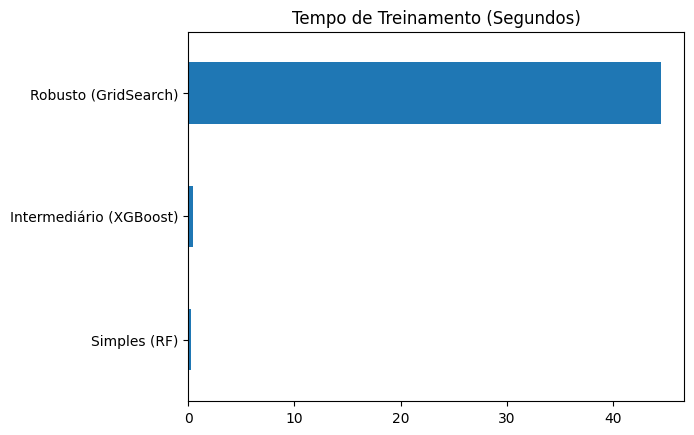

In [11]:
import time

# Dicionário para armazenar os tempos
pipeline_times = {}

# Lista com nossos modelos para facilitar o loop
pipelines = [
    ("Simples (RF)", pipeline_simple),
    ("Intermediário (XGBoost)", pipeline_inter),
    ("Robusto (GridSearch)", robust_search)
]

print("🚀 Iniciando o treinamento dos Pipelines...\n")

for name, pipe in pipelines:
    start_time = time.time() # Marca o início
    
    # Treinando o modelo
    pipe.fit(X, y)
    
    end_time = time.time() # Marca o fim
    
    # Calcula a duração em segundos
    duration = end_time - start_time
    pipeline_times[name] = duration
    
    print(f"✅ {name} finalizado em: {duration:.2f} segundos")

# Exibindo o resultado final consolidado
print("\n--- RESUMO DE TEMPO ---")
print(pipeline_times)

# Transforma o dicionário em uma série e plota
pd.Series(pipeline_times).plot(kind='barh', title='Tempo de Treinamento (Segundos)')

In [12]:
print("Melhores hiperparâmetros encontrados pelo GridSearch:")
print(robust_search.best_params_)

Melhores hiperparâmetros encontrados pelo GridSearch:
{'model__learning_rate': 0.001, 'model__max_depth': 10, 'model__n_estimators': 1000}


### Corrigindo o gráfico

As diferenças nos 3 Pipelines ficou tão grande que só conseguimos ver a barra do GridSearch.

Portanto, iremos usar uma escala logarítima para corrigir isso.

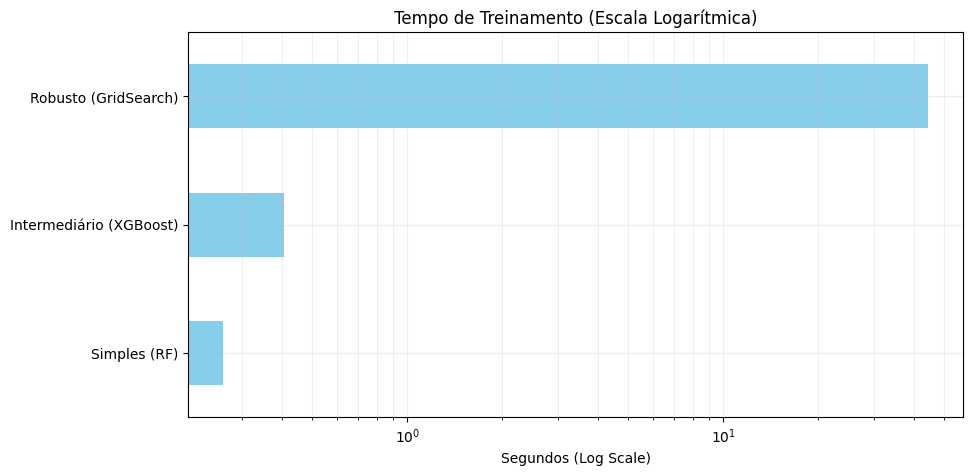

In [13]:
import matplotlib.pyplot as plt

df_results = pd.DataFrame({'Tempo (s)': pipeline_times.values()}, index=pipeline_times.keys())

# Criando o gráfico com escala logarítmica
ax = df_results['Tempo (s)'].plot(kind='barh', color='skyblue', figsize=(10, 5))
ax.set_xscale('log') # Aqui acontece a mágica

plt.title('Tempo de Treinamento (Escala Logarítmica)')
plt.xlabel('Segundos (Log Scale)')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

Melhorou, mas ainda não está fácil de enxergar os valores.

Vamos comparar o esforço computacional relativo em uma escala de 0 a 1.

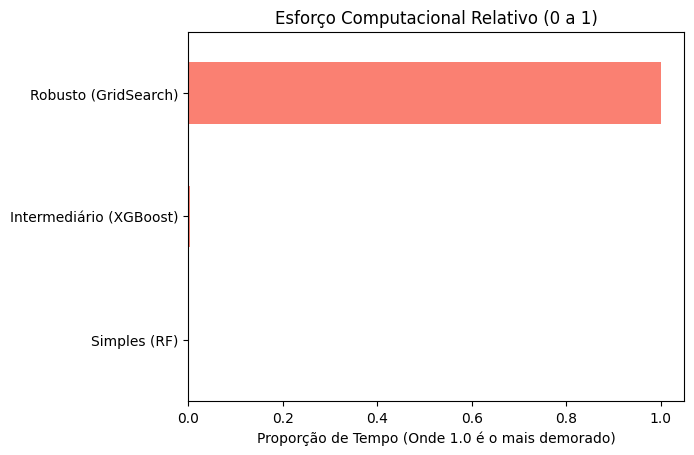

In [14]:
# Normalizando os valores para o intervalo [0, 1]
tempo_min = min(pipeline_times.values())
tempo_max = max(pipeline_times.values())

normalized_times = {k: (v - tempo_min) / (tempo_max - tempo_min) for k, v in pipeline_times.items()}

# Plotando
pd.Series(normalized_times).plot(kind='barh', color='salmon')
plt.title('Esforço Computacional Relativo (0 a 1)')
plt.xlabel('Proporção de Tempo (Onde 1.0 é o mais demorado)')
plt.show()

# 3. Avaliando as métricas

A Acurácia é apenas a ponta do iceberg. No Titanic, como em muitos problemas de classificação, olhar apenas para a acurácia pode ser enganoso.

Para uma visão completa, vamos calcular:

- **Precision (Precisão)**: De todos que o modelo disse que sobreviveram, quantos realmente sobreviveram?

- **Recall (Revocação)**: De todos que realmente sobreviveram, quantos o modelo conseguiu encontrar?

- **F1-Score**: Um equilíbrio entre Precision e Recall.

- **Balanced Accuracy (Acurácia Balanceada)**: Ela calcula a acurácia para cada classe individualmente e depois faz a média.

📊 Gerando Relatórios Detalhados...



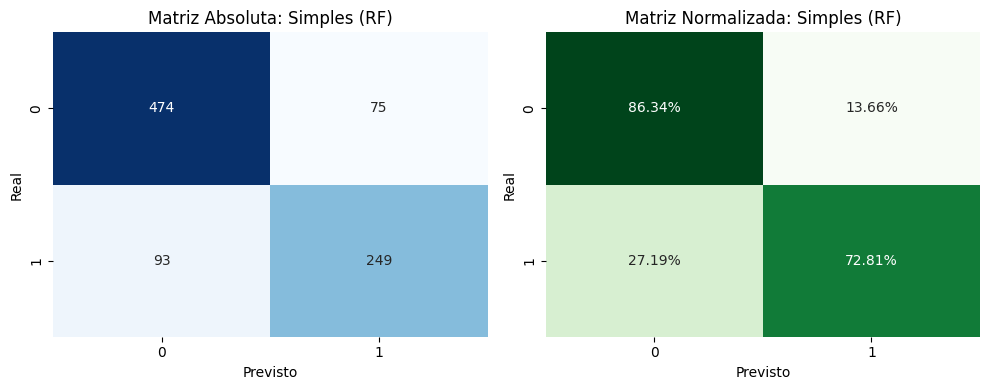

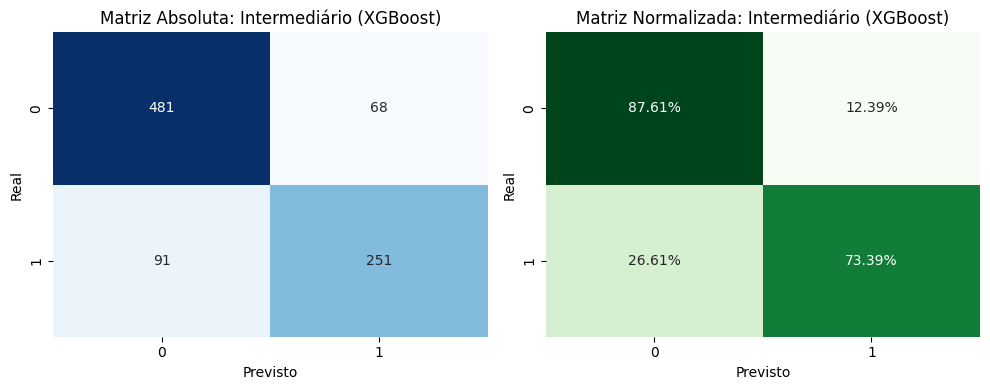

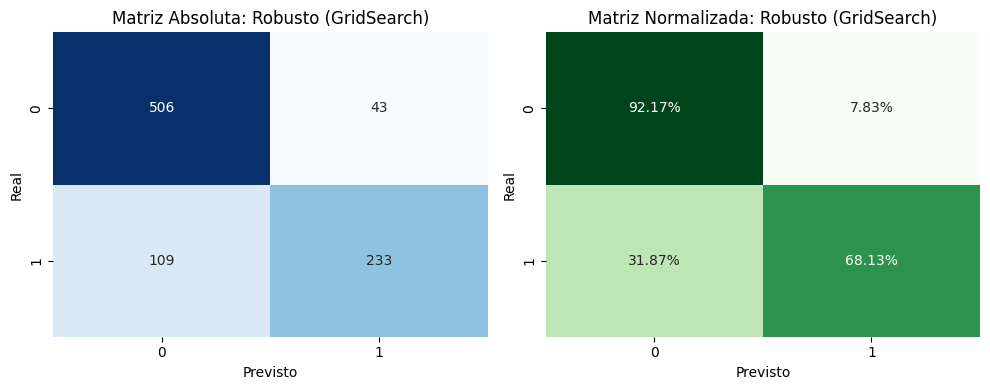


--- COMPARATIVO FINAL DE MÉTRICAS ---


,Acurácia,B. Acc,Precision,Recall,F1-Score
Modelo,,,,,
Intermediário (XGBoost),0.821549,0.805028,0.786834,0.733918,0.759455
Robusto (GridSearch),0.829405,0.801481,0.844203,0.681287,0.754045
Simples (RF),0.811448,0.795729,0.768519,0.728070,0.747748


In [15]:
from sklearn.metrics import (classification_report, confusion_matrix,
                            accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score)
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
import seaborn as sns

# Vamos criar um dicionário para guardar as métricas detalhadas
metrics_list = []

print("📊 Gerando Relatórios Detalhados...\n")

# Para este exemplo, vamos usar o X_valid e y_valid
# Ainda não criamos o conjunto de validação, mas podemos utilizar o train_test_split para criar um conjunto com 20% do conjunto do treino
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
# Porém, como estamos usando o cross_val_predict, isso não será necessário

for name, pipe in pipelines:
    y_pred = cross_val_predict(pipe, X, y, cv=5)

    # Cálculo das métricas (focando na classe 1 - Sobreviventes)
    acc = accuracy_score(y, y_pred)
    b_acc = balanced_accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    
    # Armazenar no dicionário
    metrics_list.append({
        'Modelo': name,
        'Acurácia': acc,
        'B. Acc': b_acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })
    
    # Calculando Matrizes de Confusão (Absoluta e Normalizada)
    cm = confusion_matrix(y, y_pred)
    cm_norm = confusion_matrix(y, y_pred, normalize='true') # Normalização por linha

    # Plotando as duas lado a lado
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    
    # Matriz Absoluta
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0], cbar=False)
    ax[0].set_title(f'Matriz Absoluta: {name}')
    ax[0].set_ylabel('Real')
    ax[0].set_xlabel('Previsto')
    
    # Matriz Normalizada
    sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Greens', ax=ax[1], cbar=False)
    ax[1].set_title(f'Matriz Normalizada: {name}')
    ax[1].set_ylabel('Real')
    ax[1].set_xlabel('Previsto')
    
    plt.tight_layout()
    plt.show()    

# Transformar em DataFrame para comparar lado a lado
df_comparison = pd.DataFrame(metrics_list).set_index('Modelo')
print("\n--- COMPARATIVO FINAL DE MÉTRICAS ---")
display(df_comparison.sort_values(by='F1-Score', ascending=False).style.background_gradient(cmap='YlGn'))

Podemos observar na tabela comparativa que o XGBoost teve o melhor desempenho geral (F1-Score e B. Acc).

# 4. Importância das Features

Agora precisamos saber quais informações o XGBoost usou para chegar nesses números?

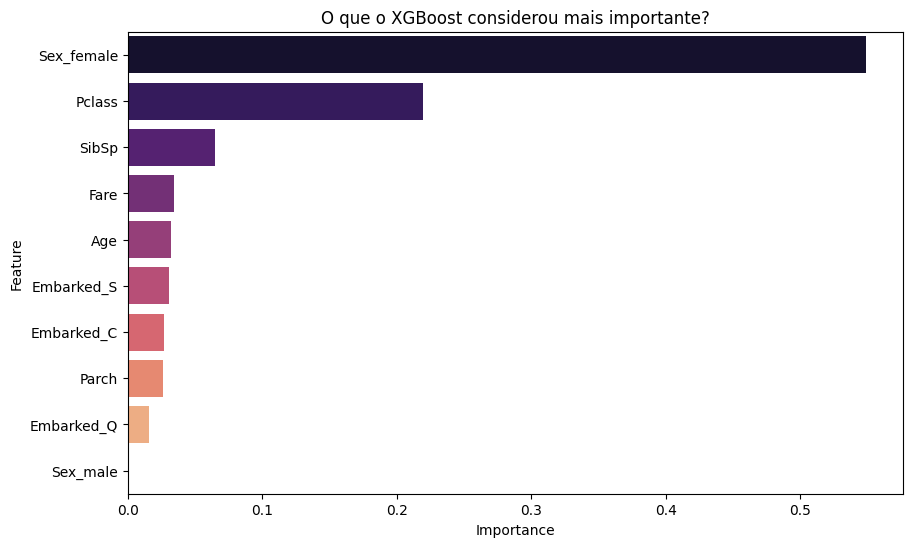

In [16]:
# Pegar o modelo treinado de dentro do Pipeline
best_model = pipeline_inter.named_steps['model']

# Pegar os nomes das colunas após a transformação
# Colunas numéricas continuam as mesmas
# Colunas categóricas foram transformadas pelo OneHotEncoder
cat_features = pipeline_inter.named_steps['preprocessor'] \
                .transformers_[1][1].named_steps['onehot'] \
                .get_feature_names_out(categorical_cols).tolist()

all_features = numerical_cols + cat_features

# Criar o DataFrame de Importância
feature_importance = pd.DataFrame({
    'Feature': all_features,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plotar gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importance, 
    hue='Feature',    # Atribui a variável ao hue
    palette='magma', 
    legend=False      # Remove a legenda para limpar o gráfico
)
plt.title('O que o XGBoost considerou mais importante?')
plt.show()

Agora que temos o gráfico, as 3 primeiras barras nos revelam algumas informações:

- **Sex_female**: O modelo "aprendeu" que ser mulher é o maior preditor de sobrevivência.

- **Pclass**: A classe socioeconômica vem logo em seguida.

- **SibSp**: Número de irmãos ou cônjuges a bordo.

O tamanho da família foi um fator decisivo, mas não de forma linear. Famílias muito grandes tiveram dificuldade em se reunir e chegar aos botes juntas, enquanto pessoas sozinhas também tinham menos apoio. O XGBoost percebeu que essa contagem é um preditor forte.

## 4.1 Feature Engineering

Já que o modelo deu tanto peso para a família (SibSp), podemos ajudá-lo criando uma variável que resuma o tamanho total da família. Atualmente, a informação está dividida entre SibSp (irmãos/cônjuges) e Parch (pais/filhos).

Podemos criar a coluna FamilySize e outra chamada IsAlone (Se está sozinho):

In [17]:
# Criação da coluna Familysize
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
# Criação da coluna IsAlone
train_data['IsAlone'] = (train_data['FamilySize'] == 1).astype(int)
test_data['IsAlone'] = (test_data['FamilySize'] == 1).astype(int)

# Agora atualizamos nossa lista de colunas numéricas!
numerical_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']

In [18]:
from sklearn.model_selection import cross_val_score

X = train_data[numerical_cols + categorical_cols]
y = train_data.Survived

# Reconfigurando os Transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Pipeline Final com XGBoost
pipeline_final = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(n_estimators=500, learning_rate=0.05, n_jobs=-1, random_state=42))
])

# Avaliando o novo desempenho do modelo
scores = cross_val_score(pipeline_final, X, y, cv=5, scoring='f1')

print(f"🚀 Novo F1-Score médio: {scores.mean():.4f}")

🚀 Novo F1-Score médio: 0.7590


In [19]:
# Definimos os dois competidores
competidores = [
    ("XGBoost Original", pipeline_inter), # O original
    ("XGBoost + Engenharia", pipeline_final) # O atualizado
]

results_comparison = []

print("📊 Comparando o impacto da Engenharia de Variáveis...\n")

for name, pipe in competidores:
    # Predições
    y_pred = cross_val_predict(pipe, X, y, cv=5)
    
    # Métricas
    results_comparison.append({
        'Configuração': name,
        'Acurácia': accuracy_score(y, y_pred),
        'B. Acc': balanced_accuracy_score(y, y_pred),
        'Precision': precision_score(y, y_pred),
        'Recall': recall_score(y, y_pred),
        'F1-Score': f1_score(y, y_pred)
    })

# Exibição da Tabela
df_final_comp = pd.DataFrame(results_comparison).set_index('Configuração')
display(df_final_comp.style.background_gradient(cmap='Blues'))

📊 Comparando o impacto da Engenharia de Variáveis...



,Acurácia,B. Acc,Precision,Recall,F1-Score
Configuração,,,,,
XGBoost Original,0.821549,0.805028,0.786834,0.733918,0.759455
XGBoost + Engenharia,0.820426,0.805220,0.780864,0.739766,0.759760


# 5. Exploração adicional: Títulos dos passageiros

## 5.1 Por que os Títulos são valiosos?

Essa informação é interessante porque o título condensa várias variáveis em uma só: **Sexo**, **Idade** e **Status Social**.

**Master**: Identifica meninos (homens jovens). No Titanic, homens adultos tiveram a menor taxa de sobrevivência, mas "Masters" tiveram uma taxa muito alta. Sem o título, o modelo pode ter dificuldade em separar um menino de 5 anos de um senhor de 50 se a coluna Age estiver nula.

**Títulos Nobres**: Títulos como Dr, Lady, Sir ou The Countess indicam prestígio, o que muitas vezes resultava em prioridade no acesso aos botes, independentemente da classe.

**Imputação de Idade**: Se um passageiro não tem a idade preenchida, mas o título é "Miss", você sabe que a idade média dela provavelmente é menor do que a de uma "Mrs".

In [20]:
import re

def get_title(name):
    # Procura por um padrão de letras que termina com ponto (ex: Mr.)
    title_search = re.search(r' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

# Aplicando nos dois datasets
for df in [train_data, test_data]:
    df['Title'] = df['Name'].apply(get_title)

# Vamos ver quais títulos apareceram
print(train_data['Title'].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


Podemos ver que há alguns títulos diferentes, como **Jonkheer** e **Mlle** (*Mademoiselle*). Precisamos fazer um tratamento nessas informações.

In [21]:
for df in [train_data, test_data]:
    # Agrupando títulos similares ou raros
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Verificando o resultado final
print(train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


Com essas novas informações, vemos que os homens realmente tiveram uma taxa menor de sobrevivências, mesmo os pertecentes a nobreza.

In [22]:
# Agora podemos adicionar o Title nas variáveis categóricas
categorical_cols = ['Sex', 'Embarked', 'Title']

# Atualizando as variáveis do treino
X = train_data[numerical_cols + categorical_cols]
y = train_data.Survived

print("📊 Comparando o impacto dos Títulos dos passageiros...\n")

# Criando o Pipeline Final (O mesmo preprocessor que já usamos)
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

pipeline_ultimate = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(n_estimators=500, learning_rate=0.05, n_jobs=-1, random_state=42))
])

scores = cross_val_score(pipeline_ultimate, X, y, cv=5, scoring='f1')

print(f"🏆 F1-Score com Títulos: {scores.mean():.6f}")

📊 Comparando o impacto dos Títulos dos passageiros...

🏆 F1-Score com Títulos: 0.762305


## 5.2 Testando hiperparâmetros

O modelo ainda não melhorou bastante. Vamos utilizar o GridSearchCV para encontrar a melhor combinação de hiperparâmetros.

In [23]:
# Definir o espaço de busca
# Vamos testar combinações de n_estimators e learning_rate
param_grid = {
    'model__n_estimators': [50, 75, 100, 150, 200, 500],
    'model__learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1],
    'model__max_depth': [3, 5, 7]
}

# Configurar o GridSearch
# Usamos o pipeline_ultimate como base
grid_search = GridSearchCV(
    pipeline_ultimate, 
    param_grid, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1,
    verbose=1
)

#  Executar a busca
print("🔍 Buscando a melhor combinação de parâmetros...")
grid_search.fit(X, y)

# Resultados
print(f"✅ Melhor F1-Score: {grid_search.best_score_:.4f}")
print(f"⚙️ Melhores Parâmetros: {grid_search.best_params_}")

🔍 Buscando a melhor combinação de parâmetros...
Fitting 5 folds for each of 126 candidates, totalling 630 fits
✅ Melhor F1-Score: 0.7886
⚙️ Melhores Parâmetros: {'model__learning_rate': 0.2, 'model__max_depth': 5, 'model__n_estimators': 50}


Vamos passar mais um GridSearch, agora mais focado nos hiperparâmetros encontrados.

In [24]:
# Definir o espaço de busca
# Vamos testar combinações de n_estimators e learning_rate
param_grid = {
    'model__n_estimators': [30, 35, 40, 45, 50, 55, 60, 65, 70],
    'model__learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3],
    'model__max_depth': [4, 5, 6]
}

# Configurar o GridSearch
# Usamos o pipeline_ultimate como base
grid_search = GridSearchCV(
    pipeline_ultimate, 
    param_grid, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1,
    verbose=1
)

#  Executar a busca
print("🔍 Buscando a melhor combinação de parâmetros...")
grid_search.fit(X, y)

# Resultados
print(f"✅ Melhor F1-Score: {grid_search.best_score_:.4f}")
print(f"⚙️ Melhores Parâmetros: {grid_search.best_params_}")

🔍 Buscando a melhor combinação de parâmetros...
Fitting 5 folds for each of 135 candidates, totalling 675 fits
✅ Melhor F1-Score: 0.7925
⚙️ Melhores Parâmetros: {'model__learning_rate': 0.3, 'model__max_depth': 4, 'model__n_estimators': 35}


Encontramos novos valores. Vamos rodar o GridSearch mais uma vez, apenas por precaução.

In [25]:
# Definir o espaço de busca
# Vamos testar combinações de n_estimators e learning_rate
param_grid = {
    'model__n_estimators': [30, 33, 34, 35, 36, 37, 40],
    'model__learning_rate': [0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35],
    'model__max_depth': [3, 4, 5]
}

# Configurar o GridSearch
# Usamos o pipeline_ultimate como base
grid_search = GridSearchCV(
    pipeline_ultimate, 
    param_grid, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1,
    verbose=1
)

#  Executar a busca
print("🔍 Buscando a melhor combinação de parâmetros...")
grid_search.fit(X, y)

# Resultados
print(f"✅ Melhor F1-Score: {grid_search.best_score_:.4f}")
print(f"⚙️ Melhores Parâmetros: {grid_search.best_params_}")

🔍 Buscando a melhor combinação de parâmetros...
Fitting 5 folds for each of 189 candidates, totalling 945 fits
✅ Melhor F1-Score: 0.7939
⚙️ Melhores Parâmetros: {'model__learning_rate': 0.3, 'model__max_depth': 4, 'model__n_estimators': 36}


Após os três GridSearches conseguimos confirmar os melhores hiperparâmetros para nosso XGBoost.

## 5.3 Importância das Features (com hiperparâmetros otimizados)

Como agora temos o modelo "perfeito" e todas as variáveis (Família, Títulos, Sexo, Classe) podemos verificar a Importância das Features mais uma vez.

Com o learning_rate mais alto, o modelo pode ter mudado suas prioridades.

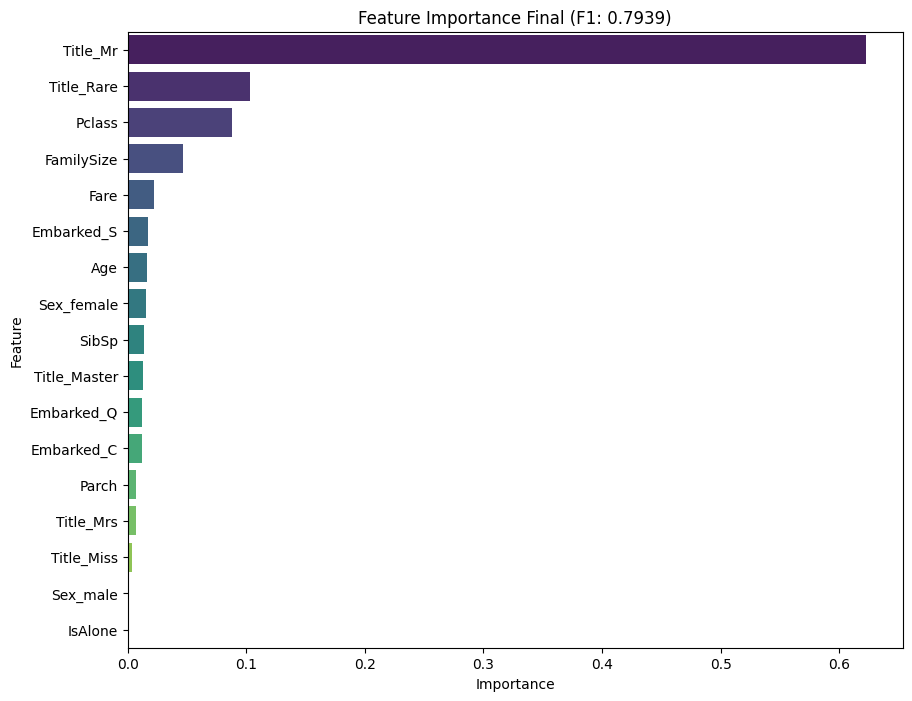

In [26]:
# Pegar o melhor modelo do GridSearch
best_pipe = grid_search.best_estimator_
model = best_pipe.named_steps['model']

# Recuperar os nomes das colunas transformadas
cat_features = best_pipe.named_steps['preprocessor'] \
                .transformers_[1][1].named_steps['onehot'] \
                .get_feature_names_out(categorical_cols).tolist()
all_features = numerical_cols + cat_features

# Criar e ordenar o DataFrame de importância
feat_imp = pd.DataFrame({'Feature': all_features, 'Importance': model.feature_importances_})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plotar gráfico
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp, hue='Feature', palette='viridis', legend=False)
plt.title(f'Feature Importance Final (F1: {grid_search.best_score_:.4f})')
plt.show()

## 5.4 Comparação final entre os modelos Pipeline

Agora que extraimos tudo (ou quase tudo) de nosso Pipeline, podemos fazer a comparação final e ver o ganho que obtivemos.

🏁 Iniciando o duelo final de modelos...


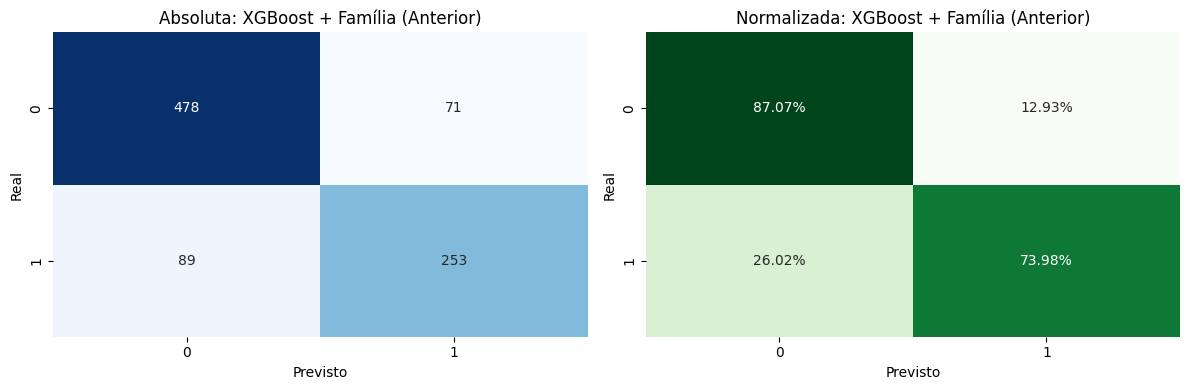

📊 XGBoost + Família (Anterior) -> F1-Score: 0.7598 | Recall (Taxa de Sobreviventes Salvos): 73.98%
----------------------------------------------------------------------------------------------------


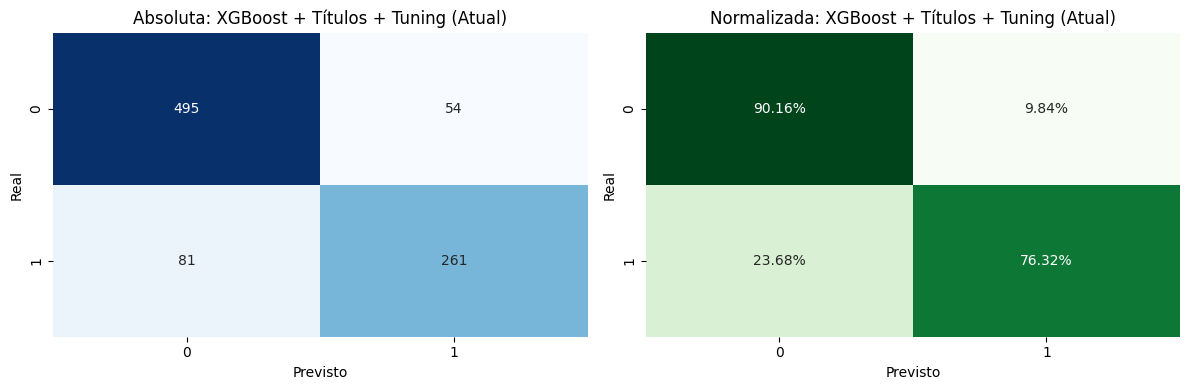

📊 XGBoost + Títulos + Tuning (Atual) -> F1-Score: 0.7945 | Recall (Taxa de Sobreviventes Salvos): 76.32%
----------------------------------------------------------------------------------------------------


,Acurácia,B. Acc,Precision,Recall,F1-Score
Modelo,,,,,
XGBoost + Família (Anterior),0.820426,0.805220,0.780864,0.739766,0.759760
XGBoost + Títulos + Tuning (Atual),0.848485,0.832399,0.828571,0.763158,0.794521


In [27]:
# Definimos os modelos para o duelo final
# O 'best_estimator_' é o modelo que o GridSearch marcou como campeão
modelos_finais = [
    ("XGBoost + Família (Anterior)", pipeline_final),
    ("XGBoost + Títulos + Tuning (Atual)", grid_search.best_estimator_)
]

final_results = []

print("🏁 Iniciando o duelo final de modelos...")

for name, pipe in modelos_finais:
    # Predições via Cross-Validation para evitar sorte/azar
    y_pred = cross_val_predict(pipe, X, y, cv=5)
    
    final_results.append({
        'Modelo': name,
        'Acurácia': accuracy_score(y, y_pred),
        'B. Acc': balanced_accuracy_score(y, y_pred),
        'Precision': precision_score(y, y_pred),
        'Recall': recall_score(y, y_pred),
        'F1-Score': f1_score(y, y_pred)
    })

    # Gerando as matrizes
    cm = confusion_matrix(y, y_pred)
    cm_norm = confusion_matrix(y, y_pred, normalize='true')

    # Plotando lado a lado
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    
    # Matriz Absoluta
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0], cbar=False)
    ax[0].set_title(f'Absoluta: {name}')
    ax[0].set_ylabel('Real')
    ax[0].set_xlabel('Previsto')
    
    # Matriz Normalizada
    sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Greens', ax=ax[1], cbar=False)
    ax[1].set_title(f'Normalizada: {name}')
    ax[1].set_ylabel('Real')
    ax[1].set_xlabel('Previsto')
    
    plt.tight_layout()
    plt.show()
    
    # Resumo rápido abaixo de cada par de matrizes
    f1 = f1_score(y, y_pred)
    rec = recall_score(y, y_pred)
    print(f"📊 {name} -> F1-Score: {f1:.4f} | Recall (Taxa de Sobreviventes Salvos): {rec:.2%}")
    print("-" * 100)

# Exibição da Tabela Comparativa
df_final = pd.DataFrame(final_results).set_index('Modelo')
# Aplicando um gradiente para destacar os melhores valores
display(df_final.style.background_gradient(cmap='RdYlGn'))

# 6. Fine Tuning no modelo Baseline

Podemos testar mais algumas estratégias para ver se nosso modelo pode melhorar:

**1. Imputação Inteligente de Idade**
Atualmente, estamos usando a mediana para preencher idades nulas. Mas agora que temos os Títulos, podemos ser mais precisos. Um "Master" com idade nula certamente é uma criança, enquanto um "Mr" é um adulto.

**Ideia**: Preencher a idade usando a mediana de cada Título.

**2. Extração de Cabines (Deck)**
A coluna Cabin parece inútil por ter muitos nulos, mas a letra da cabine (A, B, C, D, E...) indica o Deck onde o passageiro estava. Decks superiores ficavam mais perto dos botes.

**Ideia**: Extrair a primeira letra da cabine. Se for nulo, marcar como "Unknown".

**3. Ensemble (Voting Classifier)**
Em vez de confiar só no XGBoost, podemos fazer uma "votação". Pegamos o melhor XGBoost, um Random Forest tunado e um Logistic Regression, e deixamos eles votarem no resultado final. Isso costuma estabilizar as predições e eliminar erros individuais.

In [28]:
# Fazendo a imputação inteligente ANTES do pipeline
for df in [train_data, test_data]:
    # Agrupamos por Título e preenchemos a idade com a mediana de cada grupo
    df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

print("✅ Idades imputadas com base nos títulos (Master, Miss, Mr, etc.)")

✅ Idades imputadas com base nos títulos (Master, Miss, Mr, etc.)


In [29]:
for df in [train_data, test_data]:
    # Pegamos a primeira letra da cabine, se for nulo, usamos 'U' (Unknown)
    df['Deck'] = df['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'U')

# Adicionamos 'Deck' às colunas categóricas
categorical_cols = ['Sex', 'Embarked', 'Title', 'Deck']

print("✅ Informação de Deck extraída da coluna Cabin.")

✅ Informação de Deck extraída da coluna Cabin.


In [30]:
# Atualizando os dados de treino
X = train_data[numerical_cols + categorical_cols]
y = train_data.Survived

# O preprocessor continua o mesmo, ele vai detectar automaticamente a nova coluna 'Deck'
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

pipeline_refined = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(n_estimators=35, learning_rate=0.3, max_depth=4, n_jobs=-1, random_state=42))
])

# Avaliando
scores_refined = cross_val_score(pipeline_refined, X, y, cv=5, scoring='f1')
print(f"🚀 F1-Score após Imputação por Título e Decks: {scores_refined.mean():.4f}")

🚀 F1-Score após Imputação por Título e Decks: 0.7716


Vamos utilizar o GridSearchCV mais uma vez para garantir que escolhemos os melhores hiperparâmetros para o modelo.

In [31]:
# Definindo o espaço de busca
# Vamos testar valores próximos aos que usamos antes
param_grid = {
    'model__n_estimators': [20, 25, 30, 35, 40, 45, 50],
    'model__learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'model__max_depth': [3, 4, 5],
    'model__gamma': [0, 0.1, 0.2] # Adicionando regularização para evitar overfitting
}

# Configuramos o GridSearch usando o pipeline_refined
grid_search_refined = GridSearchCV(
    pipeline_refined, 
    param_grid, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1,
    verbose=1
)

# Executamos a busca nos dados atualizados
print("🔍 Otimizando o modelo com Idades por Título e Decks...")
grid_search_refined.fit(X, y)

# Resultados Finais
print(f"✅ Melhor F1-Score Refinado: {grid_search_refined.best_score_:.4f}")
print(f"⚙️ Melhores Parâmetros: {grid_search_refined.best_params_}")

🔍 Otimizando o modelo com Idades por Título e Decks...
Fitting 5 folds for each of 315 candidates, totalling 1575 fits
✅ Melhor F1-Score Refinado: 0.7905
⚙️ Melhores Parâmetros: {'model__gamma': 0.2, 'model__learning_rate': 0.4, 'model__max_depth': 5, 'model__n_estimators': 20}


Como houve muitas mudanças em relação ao último pipeline, vamos aplicar o GridSearchCV de novo.

In [32]:
# Definindo o espaço de busca
# Vamos testar valores próximos aos que usamos antes
param_grid = {
    'model__n_estimators': [19, 20, 21],
    'model__learning_rate': [0.39, 0.4, 0.41],
    'model__max_depth': [4, 5, 6],
    'model__gamma': [0.19, 0.2, 0.21] # Adicionando regularização para evitar overfitting
}

# Configuramos o GridSearch usando o pipeline_refined
grid_search_refined = GridSearchCV(
    pipeline_refined, 
    param_grid, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1,
    verbose=1
)

# Executamos a busca nos dados atualizados
print("🔍 Otimizando o modelo com Idades por Título e Decks...")
grid_search_refined.fit(X, y)

# Resultados Finais
print(f"✅ Melhor F1-Score Refinado: {grid_search_refined.best_score_:.4f}")
print(f"⚙️ Melhores Parâmetros: {grid_search_refined.best_params_}")

🔍 Otimizando o modelo com Idades por Título e Decks...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
✅ Melhor F1-Score Refinado: 0.7905
⚙️ Melhores Parâmetros: {'model__gamma': 0.2, 'model__learning_rate': 0.4, 'model__max_depth': 5, 'model__n_estimators': 20}


Os valores se confirmaram, mas vamos rodar o GridSearchCV uma última vez.

In [33]:
# Definindo o espaço de busca
# Vamos testar valores próximos aos que usamos antes
param_grid = {
    'model__n_estimators': [19, 20, 21],
    'model__learning_rate': [0.399, 0.4, 0.401],
    'model__max_depth': [4, 5, 6],
    'model__gamma': [0.195, 0.2, 0.205] # Adicionando regularização para evitar overfitting
}

# Configuramos o GridSearch usando o pipeline_refined
grid_search_refined = GridSearchCV(
    pipeline_refined, 
    param_grid, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1,
    verbose=1
)

# Executamos a busca nos dados atualizados
print("🔍 Otimizando o modelo com Idades por Título e Decks...")
grid_search_refined.fit(X, y)

# Resultados Finais
print(f"✅ Melhor F1-Score Refinado: {grid_search_refined.best_score_:.4f}")
print(f"⚙️ Melhores Parâmetros: {grid_search_refined.best_params_}")

🔍 Otimizando o modelo com Idades por Título e Decks...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
✅ Melhor F1-Score Refinado: 0.7905
⚙️ Melhores Parâmetros: {'model__gamma': 0.2, 'model__learning_rate': 0.4, 'model__max_depth': 5, 'model__n_estimators': 20}


## 6.1 Ensemble (Voting Classifier)

o XGBoost é ótimo, mas ele tem seus pontos cegos. Se combinarmos ele com um Random Forest (que olha para os dados de forma diferente) e uma Regressão Logística (que é um modelo linear estável), a média dos votos tende a ser mais robusta.

Vamos começar otimizando o Random Forest.

In [34]:
# Definir o Pipeline para RF
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# Grade de parâmetros para RF
param_grid_rf = {
    'model__n_estimators': [215, 220, 225],
    'model__max_depth': [5, 6, 7],
    'model__min_samples_leaf': [1, 2, 3],
    'model__criterion': ['gini', 'entropy']
}

grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X, y)

print(f"🌲 Melhor F1-Score RF: {grid_rf.best_score_:.4f}")
print(f"⚙️ Melhores Parâmetros RF: {grid_rf.best_params_}")

🌲 Melhor F1-Score RF: 0.7758
⚙️ Melhores Parâmetros RF: {'model__criterion': 'gini', 'model__max_depth': 6, 'model__min_samples_leaf': 2, 'model__n_estimators': 220}


Agora podemos otimizar a Regressão Logística.

In [35]:
from sklearn.linear_model import LogisticRegression

# Definir o Pipeline para LR
pipeline_lr1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=2000, random_state=42))
])

# Grade de parâmetros para LR
param_grid_lr1 = {
    'model__C': [0.33, 0.34, 0.35],
    'model__solver': ['liblinear'], # liblinear é bom para datasets pequenos
    'model__penalty': ['l1', 'l2'],
    'model__class_weight': [None, 'balanced']
}

grid_lr1 = GridSearchCV(pipeline_lr1, param_grid_lr1, cv=5, scoring='f1', n_jobs=-1)
grid_lr1.fit(X, y)

print(f"📈 Melhor F1-Score LR: {grid_lr1.best_score_:.4f}")
print(f"⚙️ Melhores Parâmetros LR: {grid_lr1.best_params_}")

📈 Melhor F1-Score LR: 0.7746
⚙️ Melhores Parâmetros LR: {'model__C': 0.34, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


Como o solver 'lbfgs' não aceita penalidade precisamos testá-lo em uma nova célular.

In [36]:
# Definir o Pipeline para LR
pipeline_lr2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=2000, random_state=42))
])

# Grade de parâmetros para LR
param_grid_lr2 = {
    'model__C': [0.30, 0.35, 0.40],
    'model__solver': ['lbfgs'],
    'model__class_weight': [None, 'balanced']
}

grid_lr2 = GridSearchCV(pipeline_lr2, param_grid_lr2, cv=5, scoring='f1', n_jobs=-1)
grid_lr2.fit(X, y)

print(f"📈 Melhor F1-Score LR: {grid_lr2.best_score_:.4f}")
print(f"⚙️ Melhores Parâmetros LR: {grid_lr2.best_params_}")

📈 Melhor F1-Score LR: 0.7735
⚙️ Melhores Parâmetros LR: {'model__C': 0.35, 'model__class_weight': None, 'model__solver': 'lbfgs'}


In [37]:
# Agora precisamos pegar a melhor LR
grid_lr = grid_lr1 if grid_lr1.best_score_ > grid_lr2.best_score_ else grid_lr2

print(f"📈 Melhor F1-Score LR: {grid_lr.best_score_:.4f}")
print(f"⚙️ Melhores Parâmetros LR: {grid_lr.best_params_}")

📈 Melhor F1-Score LR: 0.7746
⚙️ Melhores Parâmetros LR: {'model__C': 0.34, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


In [38]:
from sklearn.ensemble import VotingClassifier

# Extraímos os melhores modelos (já treinados com os melhores parâmetros)
# Usamos o .best_estimator_.named_steps['model'] para pegar apenas o algoritmo tunado
xgb_top = grid_search_refined.best_estimator_.named_steps['model']
rf_top = grid_rf.best_estimator_.named_steps['model']
lr_top = grid_lr.best_estimator_.named_steps['model']

# Criamos o Comitê (Voting Classifier)
# Usamos 'soft' porque ele tira a média das probabilidades, o que é mais refinado que o voto seco (hard)
voting_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_top),
        ('rf', rf_top),
        ('lr', lr_top)
    ],
    voting='soft',
    weights=[2, 1, 1] # Opcional: damos peso 2 para o XGBoost por ele ser o melhor modelo
)

# Criamos o Pipeline Definitivo
# O preprocessor é o mesmo que já usamos, garantindo que os dados cheguem limpos ao comitê
pipeline_ultimate_ensemble = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ensemble', voting_model)
])

# Avaliação Final com Cross-Validation
scores_final = cross_val_score(pipeline_ultimate_ensemble, X, y, cv=5, scoring='f1')

print(f"🏟️ F1-Score do Ensemble Final: {scores_final.mean():.4f}")
print(f"📊 Desvio Padrão: {scores_final.std():.4f} (Quanto menor, mais confiável é o modelo)")

🏟️ F1-Score do Ensemble Final: 0.7744
📊 Desvio Padrão: 0.0426 (Quanto menor, mais confiável é o modelo)


In [39]:
# Definindo o comitê base sem pesos fixos para o GridSearch
voting_model = VotingClassifier(
    estimators=[('xgb', xgb_top), ('rf', rf_top), ('lr', lr_top)],
    voting='soft'
)

pipeline_ultimate_ensemble = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ensemble', voting_model)
])

# Testando combinações de pesos
param_grid_weights = {
    'ensemble__weights': [[1, 1, 1], [2, 1, 1], [1, 2, 1], [1, 1, 2], [3, 1, 1], [3, 2, 1]]
}

search_weights = GridSearchCV(pipeline_ultimate_ensemble, param_grid_weights, cv=5, scoring='f1')
search_weights.fit(X, y)

print(f"🏆 Melhor F1 com pesos: {search_weights.best_score_:.4f}")
print(f"⚖️ Pesos ideais: {search_weights.best_params_}")

🏆 Melhor F1 com pesos: 0.7829
⚖️ Pesos ideais: {'ensemble__weights': [1, 1, 2]}


In [40]:
# Testando uma gama maior para a Regressão Logística (o terceiro valor)
param_grid_weights = {
    'ensemble__weights': [
        [1, 1, 2], 
        [1, 1, 3], 
        [2, 1, 3], 
        [1, 2, 3],
        [0.5, 0.5, 2] # Testando dar quase todo o poder para a LR
    ]
}

search_weights = GridSearchCV(pipeline_ultimate_ensemble, param_grid_weights, cv=5, scoring='f1')
search_weights.fit(X, y)

print(f"🏆 Novo recorde do Ensemble: {search_weights.best_score_:.4f}")
print(f"⚖️ Novos pesos ideais: {search_weights.best_params_}")

🏆 Novo recorde do Ensemble: 0.7829
⚖️ Novos pesos ideais: {'ensemble__weights': [1, 1, 2]}


Já temos um modelo sólido e eficiente. Mas ainda podemos investigar mais algumas coisas.

# 7. Análise de erros

Em vez de pedir para o modelo "tentar de novo", vamos dar uma lupa para ele e perguntar: "Aonde exatamente você está tropeçando?"

Vamos criar um DataFrame de erro para identificar quais passageiros estão confundindo nosso Ensemble.

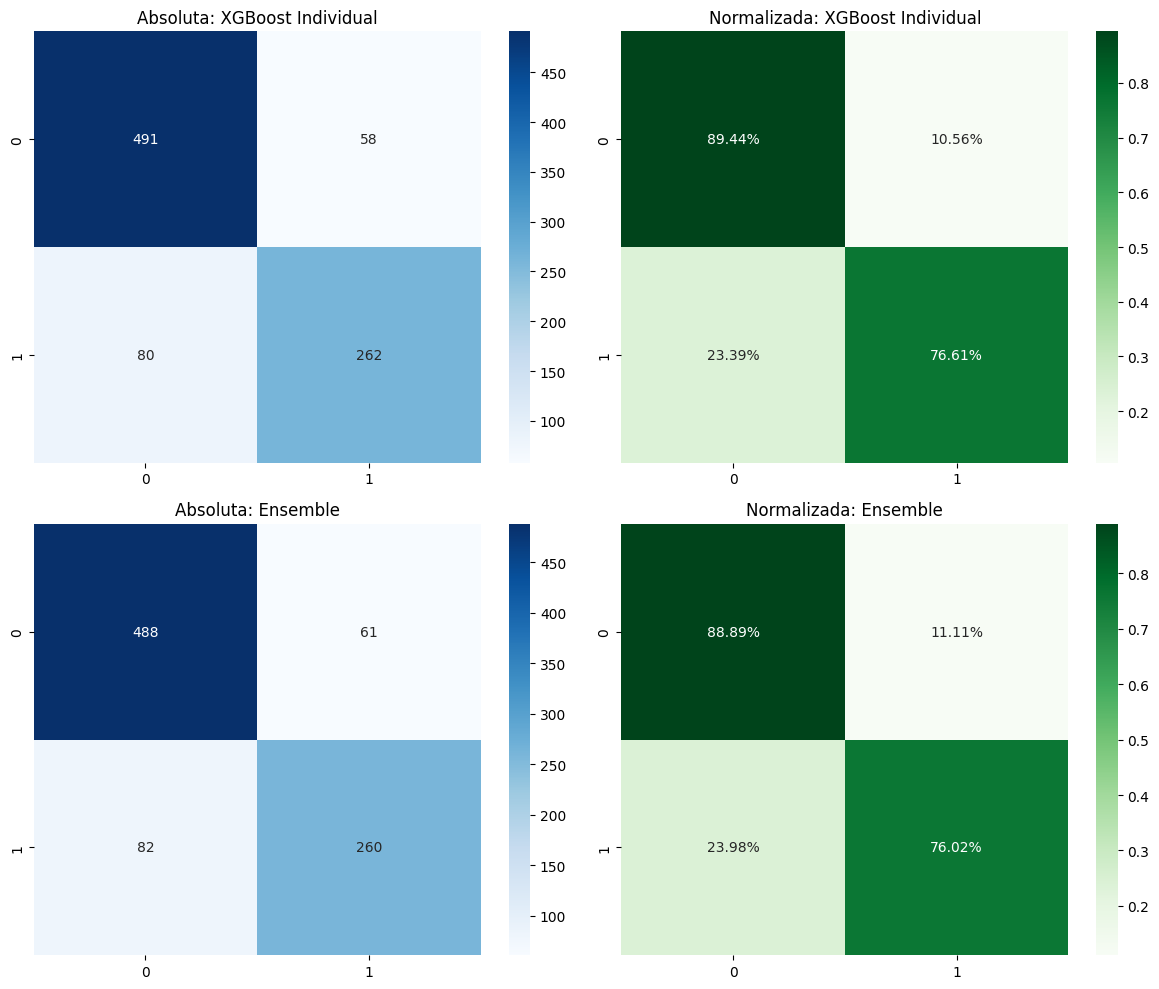

,Acurácia,Precisão,Recall,F1-Score
Modelo,,,,
XGBoost Individual,0.845118,0.818750,0.766082,0.791541
Ensemble,0.839506,0.809969,0.760234,0.784314


In [41]:
# Definimos os dois competidores finais
modelos_finais = [
    ("XGBoost Individual", grid_search_refined.best_estimator_),
    ("Ensemble", search_weights.best_estimator_)
]

resumo_metricas = []

# Criando a figura para as matrizes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, (name, pipe) in enumerate(modelos_finais):
    # Predições via Cross-Validation
    y_pred = cross_val_predict(pipe, X, y, cv=5)
    
    # Cálculo das métricas
    resumo_metricas.append({
        'Modelo': name,
        'Acurácia': accuracy_score(y, y_pred),
        'Precisão': precision_score(y, y_pred),
        'Recall': recall_score(y, y_pred),
        'F1-Score': f1_score(y, y_pred)
    })
    
    # Matriz de Confusão Absoluta
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i, 0])
    axes[i, 0].set_title(f'Absoluta: {name}')
    
    # Matriz de Confusão Normalizada
    cm_norm = confusion_matrix(y, y_pred, normalize='true')
    sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Greens', ax=axes[i, 1])
    axes[i, 1].set_title(f'Normalizada: {name}')

plt.tight_layout()
plt.show()

# Exibindo a Tabela Comparativa
df_comparativo = pd.DataFrame(resumo_metricas).set_index('Modelo')
display(df_comparativo.style.background_gradient(cmap='RdYlGn'))

In [42]:
# Pegar as predições do Ensemble
y_pred_final = cross_val_predict(pipeline_ultimate_ensemble, X, y, cv=5)

# Criar um DataFrame com os dados originais + previsões
# Usamos o 'train_data' original para ver os nomes e cabines originais
error_df = train_data.copy()
error_df['Predicted'] = y_pred_final
error_df['Correct'] = (error_df['Survived'] == error_df['Predicted'])

# Filtrar apenas os erros
errors = error_df[error_df['Correct'] == False]

print(f"Total de erros: {len(errors)} de {len(train_data)} passageiros.")

Total de erros: 145 de 891 passageiros.


Agora, vamos agrupar esses erros por categorias para ver se existe um padrão.

## 7.1 Erro por Classe e Sexo

Será que o modelo erra mais homens da 1ª classe ou mulheres da 3ª?

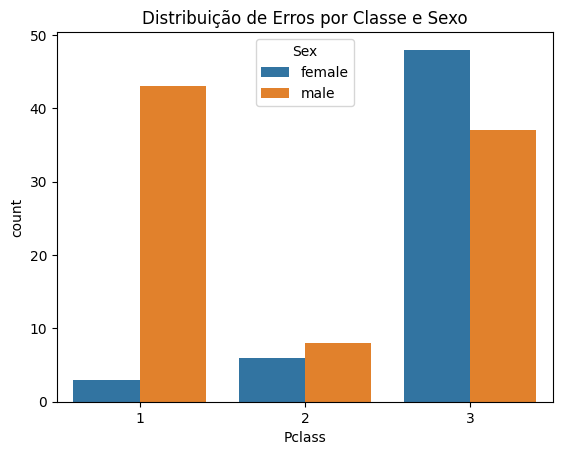

In [43]:
error_analysis = errors.groupby(['Pclass', 'Sex']).size().reset_index(name='count')
sns.barplot(data=error_analysis, x='Pclass', y='count', hue='Sex')
plt.title('Distribuição de Erros por Classe e Sexo')
plt.show()

Números absolutos podem ser enganosos. Precisamos normalizar os dados e gerar um novo gráfico.

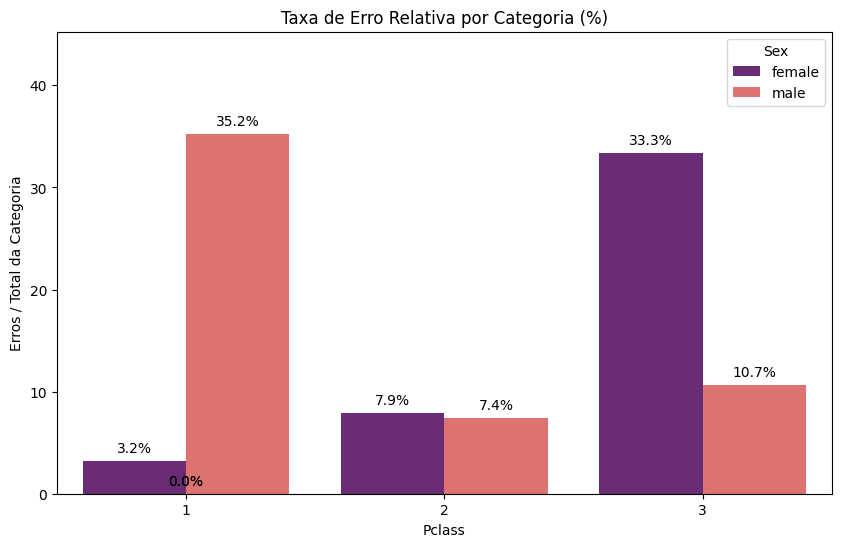

In [44]:
# Contar o total de passageiros por Classe e Sexo no dataset original
total_counts = train_data.groupby(['Pclass', 'Sex']).size().reset_index(name='total')

# Contar os erros por Classe e Sexo
error_counts = errors.groupby(['Pclass', 'Sex']).size().reset_index(name='error_count')

# Unir os dados e calcular a taxa percentual
analysis_norm = pd.merge(error_counts, total_counts, on=['Pclass', 'Sex'])
analysis_norm['error_rate (%)'] = (analysis_norm['error_count'] / analysis_norm['total']) * 100

# Visualização
plt.figure(figsize=(10, 6))
sns.barplot(data=analysis_norm, x='Pclass', y='error_rate (%)', hue='Sex', palette='magma')

# Adicionar os rótulos de porcentagem no topo das barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}%', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')

plt.title('Taxa de Erro Relativa por Categoria (%)')
plt.ylim(0, max(analysis_norm['error_rate (%)']) + 10)
plt.ylabel('Erros / Total da Categoria')
plt.show()

Podemos ver que muitas mulheres da 3ª classe não sobreviveram. Vamos investigar o motivo.

In [45]:
# Isolando as mulheres da 3ª classe que o modelo errou (Falsos Positivos)
# Elas morreram (Survived=0), mas o modelo previu que viveriam (Predicted=1)
mulheres_3cl_erro = errors[(errors['Sex'] == 'female') & (errors['Pclass'] == 3)]

print(f"Análise de {len(mulheres_3cl_erro)} mulheres da 3ª classe que o modelo não 'salvou':")

# Verificando o tamanho da família e o porto
print("\nDistribuição por Porto de Embarque:")
print(mulheres_3cl_erro['Embarked'].value_counts())

print("\nMédia de Tamanho de Família (SibSp + Parch):")
print(mulheres_3cl_erro['FamilySize'].mean())

Análise de 48 mulheres da 3ª classe que o modelo não 'salvou':

Distribuição por Porto de Embarque:
Embarked
S    33
Q     8
C     7
Name: count, dtype: int64

Média de Tamanho de Família (SibSp + Parch):
2.125


A maioria embarcou no Porto S e as famílias são grandes.

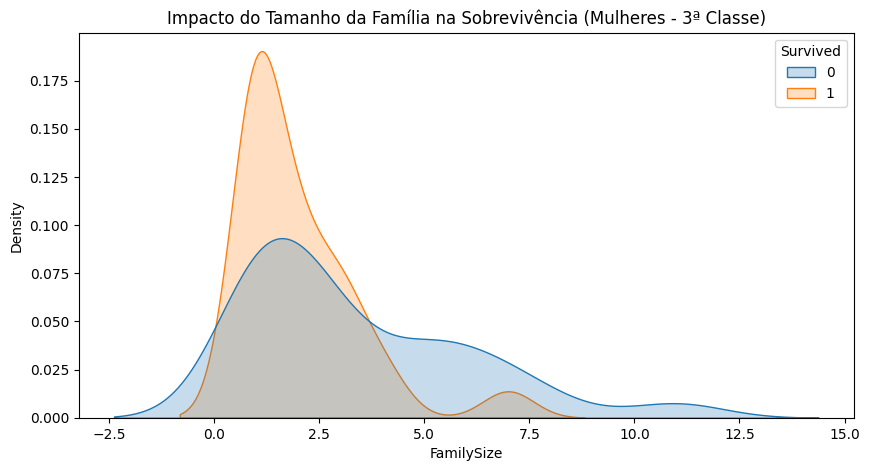

In [46]:
# Comparando o FamilySize de quem o modelo acertou vs errou (apenas mulheres 3ª classe)
mulheres_3cl_todas = train_data[(train_data['Sex'] == 'female') & (train_data['Pclass'] == 3)].copy()
mulheres_3cl_todas['Acerto'] = (mulheres_3cl_todas['Survived'] == 1) # Na 3ª classe, o modelo tende a prever que todas vivem

plt.figure(figsize=(10, 5))
sns.kdeplot(data=mulheres_3cl_todas, x='FamilySize', hue='Survived', fill=True)
plt.title('Impacto do Tamanho da Família na Sobrevivência (Mulheres - 3ª Classe)')
plt.show()

Agora confirmamos que mulheres da 3ª classe com famílias grandes (2 filhos ou mais) tiveram uma menor taxa de sobrevivência.

Vamos criar uma nova feature com essa informação.

In [47]:
for df in [train_data, test_data]:
    # Criamos uma flag para famílias "grandes" (mais de 4 pessoas = mãe + pai + 2 filhos)
    df['Large_Family_3cl'] = 0
    df.loc[(df['Pclass'] == 3) & (df['FamilySize'] > 4), 'Large_Family_3cl'] = 1
    
    # Também podemos criar uma para 'Mulher Solteira na 3ª Classe'
    # Às vezes, quem estava sozinha na 3ª classe teve mais agilidade para subir
    df['Solo_Woman_3cl'] = 0
    df.loc[(df['Pclass'] == 3) & (df['Sex'] == 'female') & (df['FamilySize'] == 1), 'Solo_Woman_3cl'] = 1

print("✅ Novas features de interação baseadas na análise de erro foram criadas.")

categorical_cols = ['Sex', 'Embarked', 'Title', 'Deck', 'Large_Family_3cl', 'Solo_Woman_3cl']

✅ Novas features de interação baseadas na análise de erro foram criadas.


In [48]:
# Atualizando o X do treino com as novas colunas
X = train_data[numerical_cols + categorical_cols]
y = train_data.Survived

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Criamos o Pipeline com o VotingClassifier vencedor
pipeline_ultimate_ensemble = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ensemble', voting_model) # O voting_model que definimos antes
])

# Validar se as novas features ajudaram
scores_final = cross_val_score(pipeline_ultimate_ensemble, X, y, cv=5, scoring='f1')

print(f"🚀 F1-Score com Features de Interação: {scores_final.mean():.4f}")

🚀 F1-Score com Features de Interação: 0.7797


## 7.2 "Sobreviventes Improváveis" (Falsos Negativos)

Estes são passageiros que o modelo disse que morreriam, mas viveram. Geralmente são homens da 3ª classe ou pessoas com famílias muito grandes.

In [49]:
# Falsos Negativos (Improváveis): O modelo disse que morreria, mas sobreviveu.
false_negatives = error_df[(error_df['Predicted'] == 0) & (error_df['Survived'] == 1)]

print(f"Encontramos {len(false_negatives)} sobreviventes que o modelo não previu.")

# Vamos focar nos Homens da 3ª Classe, que são os mais difíceis
homens_3cl_sobreviventes = false_negatives[(false_negatives['Sex'] == 'male') & (false_negatives['Pclass'] == 3)]

print(f"Desses, {len(homens_3cl_sobreviventes)} são homens da 3ª classe.")
display(homens_3cl_sobreviventes[['Name', 'Title', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].head(10))

Encontramos 88 sobreviventes que o modelo não previu.
Desses, 37 são homens da 3ª classe.


,Name,Title,Age,SibSp,Parch,Fare,Embarked
36,"Mamee, Mr. Hanna",Mr,30.0,0,0,7.2292,C
74,"Bing, Mr. Lee",Mr,32.0,0,0,56.4958,S
81,"Sheerlinck, Mr. Jan Baptist",Mr,29.0,0,0,9.5000,S
107,"Moss, Mr. Albert Johan",Mr,30.0,0,0,7.7750,S
127,"Madsen, Mr. Fridtjof Arne",Mr,24.0,0,0,7.1417,S
146,"Andersson, Mr. August Edvard (""Wennerstrom"")",Mr,27.0,0,0,7.7958,S
204,"Cohen, Mr. Gurshon ""Gus""",Mr,18.0,0,0,8.0500,S
207,"Albimona, Mr. Nassef Cassem",Mr,26.0,0,0,18.7875,C
220,"Sunderland, Mr. Victor Francis",Mr,16.0,0,0,8.0500,S
261,"Asplund, Master. Edvin Rojj Felix",Master,3.0,4,2,31.3875,S


Vamos separar esses sobreviventes em grupos para facilitar nossa análise.

In [50]:
# Filtrar apenas homens da 3ª classe no dataset original
homens_3cl = train_data[(train_data['Sex'] == 'male') & (train_data['Pclass'] == 3)].copy()

# Criar uma coluna para identificar se o modelo errou ou acertou
# Aqui focamos nos "Sobreviventes Reais" vs "Não Sobreviventes Reais"
tabela_comparativa = homens_3cl.groupby('Survived').agg({
    'Age': 'mean',
    'Fare': 'mean',
    'Embarked': lambda x: x.mode()[0], # Porto mais comum
    'PassengerId': 'count'
}).rename(columns={'PassengerId': 'Qtd_Passageiros', 'Age': 'Média_Idade', 'Fare': 'Média_Fare', 'Embarked': 'Porto_Principal'})

# Adicionar a contagem de quantos embarcaram em cada porto para detalhar
porto_dist = homens_3cl.groupby(['Survived', 'Embarked']).size().unstack(fill_value=0)

print("📊 Comparativo: Homens da 3ª Classe (Sobreviventes vs Não Sobreviventes)")
display(tabela_comparativa)

print("\n📍 Distribuição por Porto de Embarque:")
display(porto_dist)

📊 Comparativo: Homens da 3ª Classe (Sobreviventes vs Não Sobreviventes)


,Média_Idade,Média_Fare,Porto_Principal,Qtd_Passageiros
Survived,,,,
0,27.856667,12.204469,S,300
1,22.625957,15.579696,S,47



📍 Distribuição por Porto de Embarque:


Embarked,C,Q,S
Survived,,,
0,33,36,231
1,10,3,34


Podemos observar que os homens mais jovens que pagaram mais por suas passagens tiveram uma taxa de sobrevivência maior.

In [51]:
for df in [train_data, test_data]:
    # Criando o perfil do 'Jovem Ágil com Melhor Cabine' na 3ª Classe
    df['Young_HighFare_3cl_Male'] = 0
    df.loc[(df['Sex'] == 'male') & 
           (df['Pclass'] == 3) & 
           (df['Age'] <= 23) & 
           (df['Fare'] > 13), 'Young_HighFare_3cl_Male'] = 1

Vamos testar as novas features para ver se o resultado melhora.

In [52]:
# Após todas as nossas atualizações, podemos rever algumas colunas numéricas
numerical_cols = ['Age', 'Parch', 'Fare']
# Atualizamos também a lista da coluna categórica
categorical_cols = ['Pclass', 'Sex', 'Embarked', 'Title', 'Deck', 'Large_Family_3cl', 'Young_HighFare_3cl_Male']

X = train_data[numerical_cols + categorical_cols]
y = train_data.Survived

# Re-instanciando o preprocessor com as novas colunas
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Nossos modelos campeões (mantendo os parâmetros que já tunamos)
xgb_top = grid_search_refined.best_estimator_.named_steps['model']
rf_top = grid_rf.best_estimator_.named_steps['model']
lr_top = grid_lr.best_estimator_.named_steps['model']

# Montando o comitê com os pesos ideais encontrados
voting_model = VotingClassifier(
    estimators=[('xgb', xgb_top), ('rf', rf_top), ('lr', lr_top)],
    voting='soft',
    weights=[1, 1, 3] # Peso maior na LR como o Grid indicou
)

pipeline_ultimate = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ensemble', voting_model)
])

# Validação Cruzada Final
scores = cross_val_score(pipeline_ultimate, X, y, cv=5, scoring='f1')
print(f"🏟️ F1-Score do Modelo Final: {scores.mean():.4f}")

🏟️ F1-Score do Modelo Final: 0.7825


## 7.3 "Mortes Inesperadas" (Falsos Positivos)

Estes são passageiros que o modelo disse que viveriam, mas morreram. Geralmente mulheres de elite (1ª/2ª classe) ou pessoas com títulos nobres.

In [53]:
# Falsos Positivos: O modelo previu que viveriam (1), mas morreram (0).
false_positives = error_df[(error_df['Predicted'] == 1) & (error_df['Survived'] == 0)]

print(f"Total de Mortes Inesperadas: {len(false_positives)}")

# Focando nas mulheres de elite (1ª e 2ª Classe)
mulheres_elite_erro = false_positives[(false_positives['Sex'] == 'female') & (false_positives['Pclass'].isin([1, 2]))]

print(f"Mulheres de Elite que morreram: {len(mulheres_elite_erro)}")
display(mulheres_elite_erro[['Name', 'Title', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin']].head(10))

Total de Mortes Inesperadas: 57
Mulheres de Elite que morreram: 9


,Name,Title,Age,SibSp,Parch,Ticket,Fare,Cabin
41,"Turpin, Mrs. William John Robert (Dorothy Ann ...",Mrs,27.0,1,0,11668,21.0000,NaN
177,"Isham, Miss. Ann Elizabeth",Miss,50.0,0,0,PC 17595,28.7125,C49
199,"Yrois, Miss. Henriette (""Mrs Harbeck"")",Miss,24.0,0,0,248747,13.0000,NaN
297,"Allison, Miss. Helen Loraine",Miss,2.0,1,2,113781,151.5500,C22 C26
312,"Lahtinen, Mrs. William (Anna Sylfven)",Mrs,26.0,1,1,250651,26.0000,NaN
357,"Funk, Miss. Annie Clemmer",Miss,38.0,0,0,237671,13.0000,NaN
498,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Mrs,25.0,1,2,113781,151.5500,C22 C26
772,"Mack, Mrs. (Mary)",Mrs,57.0,0,0,S.O./P.P. 3,10.5000,E77
854,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",Mrs,44.0,1,0,244252,26.0000,NaN


É possível ver uma grande diferença nos valores da **Fare** para esse caso. Vamos criar um *boxplot* para uma melhor visualização.

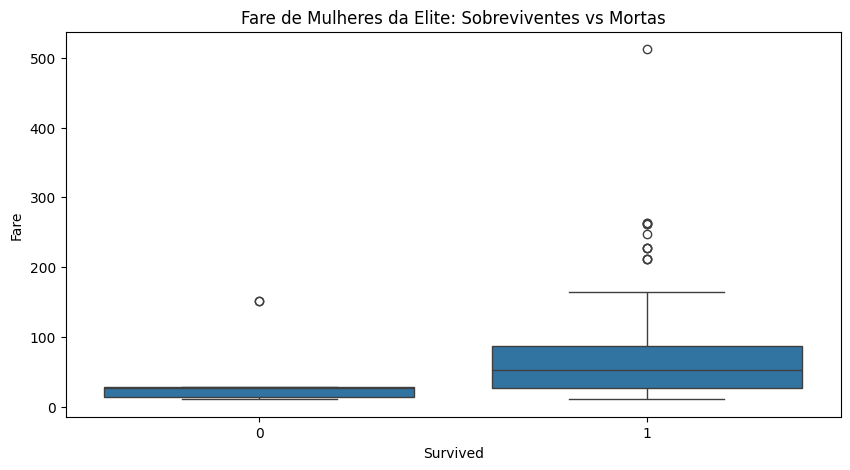

In [54]:
# Comparando Fare de mulheres da 1ª e 2ª classe: Quem viveu vs Quem morreu
mulheres_elite_todas = train_data[(train_data['Sex'] == 'female') & (train_data['Pclass'].isin([1, 2]))].copy()

plt.figure(figsize=(10, 5))
sns.boxplot(data=mulheres_elite_todas, x='Survived', y='Fare')
plt.title('Fare de Mulheres da Elite: Sobreviventes vs Mortas')
plt.show()

**Fare** mais baixo diminui a taxa de sobrevivência.

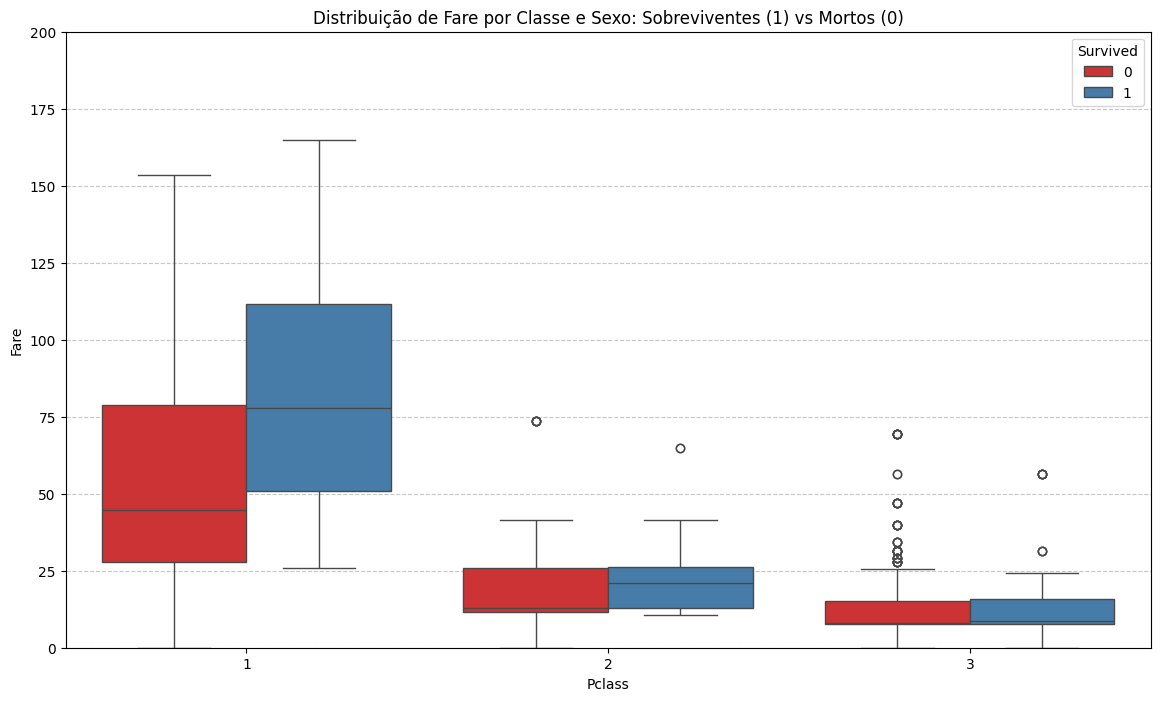

In [55]:
plt.figure(figsize=(14, 8))

# Criando o Boxplot para comparar Fare por Classe, Sexo e Sobrevivência
sns.boxplot(data=train_data, x='Pclass', y='Fare', hue='Survived', palette='Set1')

# Ajustando a escala y para ignorar outliers extremos (como a passagem de 512) 
# e focar onde a maioria dos dados está
plt.ylim(0, 200) 

plt.title('Distribuição de Fare por Classe e Sexo: Sobreviventes (1) vs Mortos (0)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Comparando os boxplots, vemos que mesmo na 1ª classe, quem pagou menos para embarcar teve uma taxa de sobrevivência menor.

In [56]:
# Analisando especificamente quem o modelo previu que viveria, mas morreu
falsos_positivos = error_df[(error_df['Predicted'] == 1) & (error_df['Survived'] == 0)]

fp_stats = falsos_positivos.groupby(['Pclass', 'Sex']).agg({
    'Fare': ['mean', 'median', 'max'],
    'Age': 'mean',
    'FamilySize': 'mean',
    'PassengerId': 'count'
})

print("📈 Estatísticas das 'Mortes Inesperadas' (Falsos Positivos):")
display(fp_stats)

📈 Estatísticas das 'Mortes Inesperadas' (Falsos Positivos):


Fare                            Age FamilySize  \
                     mean    median       max       mean       mean   
Pclass Sex                                                            
1      female  110.604167  151.5500  151.5500  25.666667   3.000000   
       male     92.704164   71.0000  247.5208  34.500000   1.909091   
2      female   18.250000   17.0000   26.0000  36.000000   1.666667   
3      female   12.477368   10.4625   24.1500  23.027027   1.891892   

              PassengerId  
                    count  
Pclass Sex                 
1      female           3  
       male            11  
2      female           6  
3      female          37

Vemos que as mulheres da 3ª classe com **Fare** baixa tiveram uma taxa de sobrevivência muito baixa. Também vemos que as mulheres da 2ª classe que não sobreviveram tinham uma média de idade maior.

Vamos adicionar essas features em nossa análise.

In [57]:
for df in [train_data, test_data]:
    # Mulheres da 3ª classe com passagens muito baratas (Cabines afastadas dos botes)
    df['LowFare_Woman_3cl'] = 0
    df.loc[(df['Sex'] == 'female') & (df['Pclass'] == 3) & (df['Fare'] < 13), 'LowFare_Woman_3cl'] = 1

    # Mulheres maduras da 2ª classe (Padrão de erro identificado na média de 36 anos)
    df['Older_Woman_2cl'] = 0
    df.loc[(df['Sex'] == 'female') & (df['Pclass'] == 2) & (df['Age'] > 35), 'Older_Woman_2cl'] = 1

# Ajuste de tipos: Pclass como categórica para o modelo entender as rupturas de classe
train_data['Pclass'] = train_data['Pclass'].astype(str)
test_data['Pclass'] = test_data['Pclass'].astype(str)

In [58]:
# Definição das colunas
numerical_cols = ['Age', 'Fare', 'FamilySize']
categorical_cols = ['Pclass', 'Sex', 'Embarked', 'Title', 'Deck', 
                    'Young_HighFare_3cl_Male', 'LowFare_Woman_3cl', 
                    'Large_Family_3cl', 'Older_Woman_2cl']

X = train_data[numerical_cols + categorical_cols]
y = train_data.Survived

# Preprocessador atualizado
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Nossos modelos tunados
xgb_top = grid_search_refined.best_estimator_.named_steps['model']
rf_top = grid_rf.best_estimator_.named_steps['model']
lr_top = grid_lr.best_estimator_.named_steps['model']

# O Comitê Final com Peso 3 na LR (Estabilidade)
voting_model = VotingClassifier(
    estimators=[('xgb', xgb_top), ('rf', rf_top), ('lr', lr_top)],
    voting='soft',
    weights=[1, 1, 3]
)

pipeline_final = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ensemble', voting_model)
])

scores = cross_val_score(pipeline_final, X, y, cv=5, scoring='f1')
print(f"🏆 F1-Score Final Consolidado: {scores.mean():.4f}")

🏆 F1-Score Final Consolidado: 0.7827


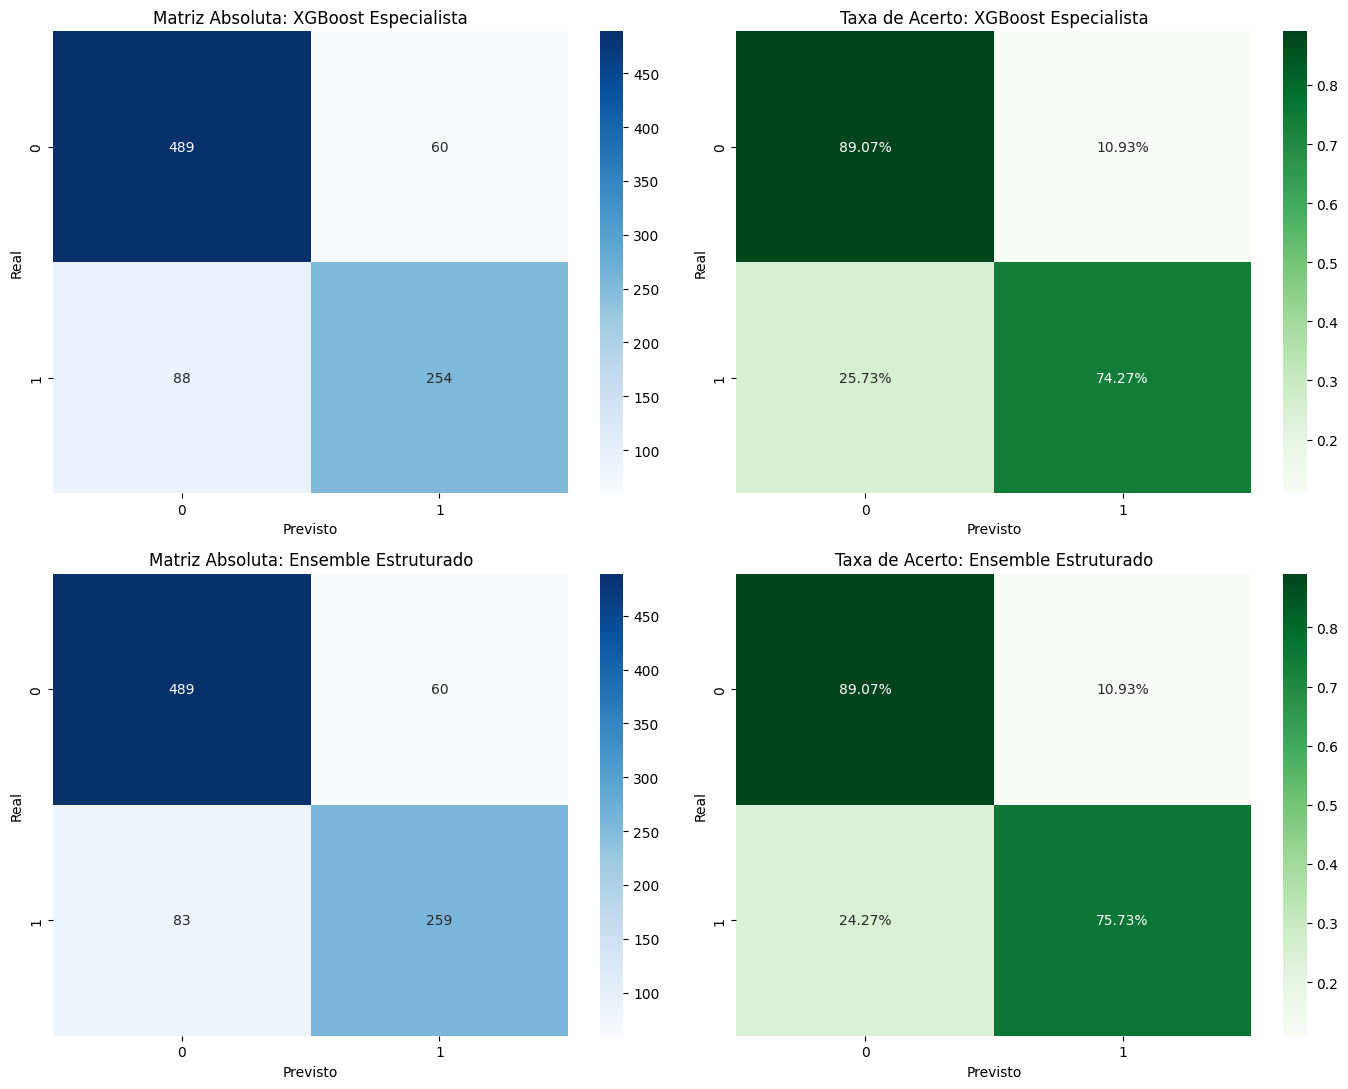

,F1-Score,Acurácia,Precisão,Recall
Modelo,,,,
XGBoost Especialista,0.774390,0.833895,0.808917,0.742690
Ensemble Estruturado,0.783661,0.839506,0.811912,0.757310


In [59]:
# Definimos os dois competidores com o preprocessador atualizado
# O XGBoost Puro (usando os melhores parâmetros que encontramos no GridSearch)
xgb_standalone = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb_top)
])

# O Ensemble (nosso modelo atual com pesos [1, 1, 3])
ensemble_final = pipeline_final

modelos_comparacao = [
    ("XGBoost Especialista", xgb_standalone),
    ("Ensemble Estruturado", ensemble_final)
]

resumo_final = []

# Preparando as Matrizes de Confusão
fig, axes = plt.subplots(2, 2, figsize=(14, 11))

for i, (name, model) in enumerate(modelos_comparacao):
    # Predições via Cross-Validation
    y_pred = cross_val_predict(model, X, y, cv=5)
    
    # Cálculo das métricas
    resumo_final.append({
        'Modelo': name,
        'F1-Score': f1_score(y, y_pred),
        'Acurácia': accuracy_score(y, y_pred),
        'Precisão': precision_score(y, y_pred),
        'Recall': recall_score(y, y_pred)
    })
    
    # Matriz Absoluta (Esquerda)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i, 0])
    axes[i, 0].set_title(f'Matriz Absoluta: {name}')
    axes[i, 0].set_xlabel('Previsto')
    axes[i, 0].set_ylabel('Real')
    
    # Matriz Normalizada (Direita) - Mostra a taxa de acerto por classe
    cm_norm = confusion_matrix(y, y_pred, normalize='true')
    sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Greens', ax=axes[i, 1])
    axes[i, 1].set_title(f'Taxa de Acerto: {name}')
    axes[i, 1].set_xlabel('Previsto')
    axes[i, 1].set_ylabel('Real')

plt.tight_layout()
plt.show()

# Exibindo a Tabela Comparativa Final
df_resumo = pd.DataFrame(resumo_final).set_index('Modelo')
display(df_resumo.style.background_gradient(cmap='viridis', axis=0))

Conseguimos melhorar nosso Ensemble, mas ainda temos mais possibilidades para explorar.

# 8. Importância das Features no Ensemble

As árvores (XGB e RF) nos permitem ver quais features foram mais decisivas. Se as nossas novas features (LowFare_Woman_3cl, etc.) estiverem no topo, sabemos que estamos no caminho certo. Se estiverem no fundo, elas podem estar gerando ruído.

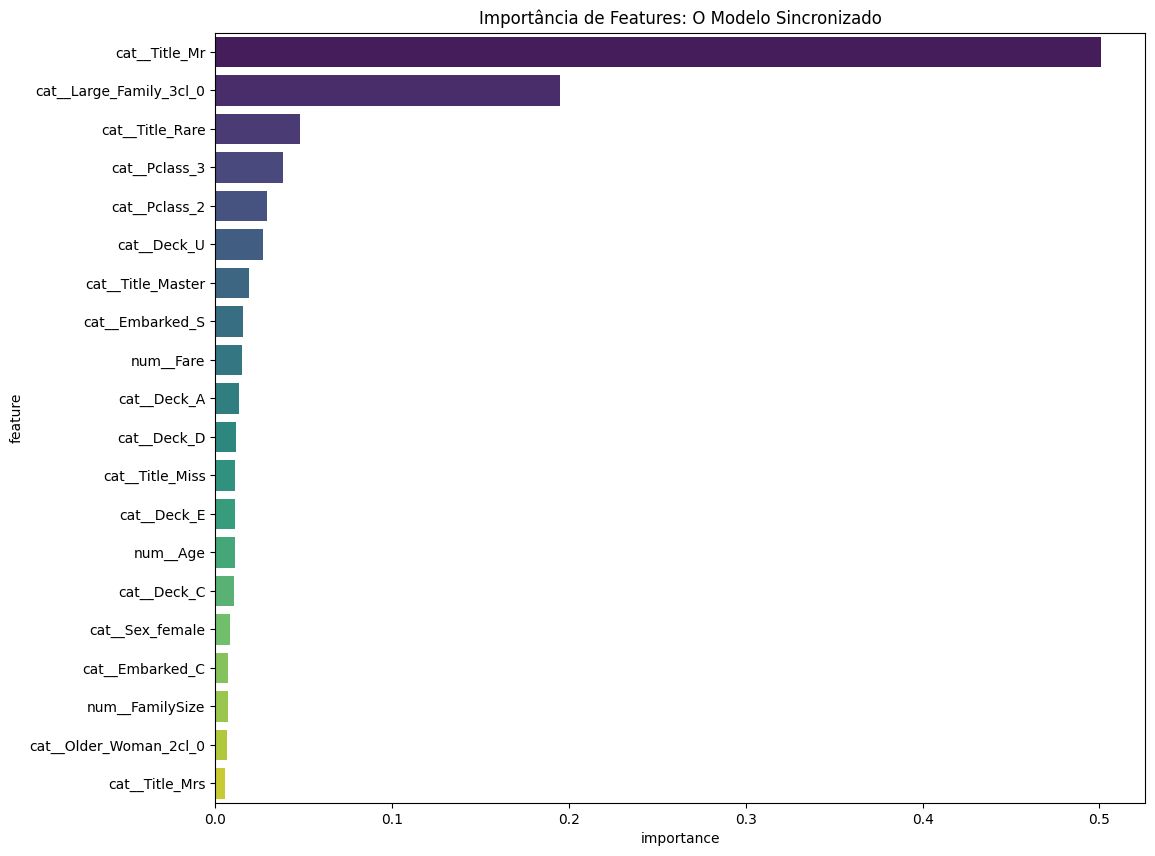

In [60]:
from sklearn.base import clone

# Clonamos os modelos base para "limpar" o aprendizado antigo (de 26 colunas)
# mas mantendo os melhores hiperparâmetros que você encontrou no GridSearch
xgb_fresh = clone(grid_search_refined.best_estimator_.named_steps['model'])
rf_fresh = clone(grid_rf.best_estimator_.named_steps['model'])
lr_fresh = clone(grid_lr.best_estimator_.named_steps['model'])

# Criamos o novo comitê (agora pronto para 33 colunas pós-transformação)
voting_model_sync = VotingClassifier(
    estimators=[('xgb', xgb_fresh), ('rf', rf_fresh), ('lr', lr_fresh)],
    voting='soft',
    weights=[1, 1, 3]
)

# Montamos o Pipeline Master com as colunas completas
pipeline_final = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ensemble', voting_model_sync)
])

# Treinamos o pipeline do zero com o X atualizado (as 33 features)
pipeline_final.fit(X, y)

# Pegamos o XGBoost que acabou de aprender com as 33 colunas
xgb_trained = pipeline_final.named_steps['ensemble'].estimators_[0]
importances = xgb_trained.feature_importances_
feature_names = pipeline_final.named_steps['preprocessor'].get_feature_names_out()

# Plotar o Comparativo Real
feat_imp = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp = feat_imp.sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(
    x='importance', 
    y='feature', 
    data=feat_imp.head(20), 
    hue='feature',           # Associa a cor à própria feature
    palette='viridis', 
    legend=False             # Remove a legenda lateral desnecessária
)
plt.title('Importância de Features: O Modelo Sincronizado')
plt.show()

É possível ver que nossas novas features estão com uma importância maior em relação ao início da análise.

In [61]:
# Usando o pipeline_final que acabamos de sincronizar e treinar
# X contém as 33 colunas e y é o alvo (Survived)
scores = cross_val_score(pipeline_final, X, y, cv=5, scoring='f1')

print(f"🚀 F1-Score Médio (Sincronizado): {scores.mean():.4f}")
print(f"📊 Desvio Padrão: {scores.std():.4f}")
print(f"✅ Scores por Fold: {scores}")

🚀 F1-Score Médio (Sincronizado): 0.7827
📊 Desvio Padrão: 0.0274
✅ Scores por Fold: [0.78195489 0.77272727 0.77037037 0.75409836 0.83453237]


## 8.1 Revisão nos hiperparâmetros com GridSearchCV

Vamos revisar os hiperparâmetros do Ensemble com o GridSearch.

In [62]:
# Definimos o espaço de busca para os pesos [XGB, RF, LR]
# Vamos testar variações ao redor do que já sabemos que funciona
param_grid_ensemble = {
    'ensemble__weights': [
        [1, 1, 2], [1, 1, 3], [1, 1, 4], 
        [2, 1, 3], [2, 1, 4], [3, 1, 5]
    ],
    'ensemble__voting': ['soft'] # 'soft' geralmente é superior para ensembles heterogêneos
}

grid_ensemble = GridSearchCV(
    pipeline_final, 
    param_grid_ensemble, 
    cv=5, 
    scoring='f1',
    n_jobs=-1
)

grid_ensemble.fit(X, y)

print(f"✨ Melhor combinação encontrada: {grid_ensemble.best_params_}")
print(f"📈 Melhor F1-Score obtido: {grid_ensemble.best_score_:.4f}")

✨ Melhor combinação encontrada: {'ensemble__voting': 'soft', 'ensemble__weights': [1, 1, 3]}
📈 Melhor F1-Score obtido: 0.7827


Confirmamos que os hiperparâmetros já são os melhores que temos.

## 8.2 Análise de erros do modelo tunado

Agora que temos o modelo mais refinado, podemos fazer uma nova análise de seus erros.

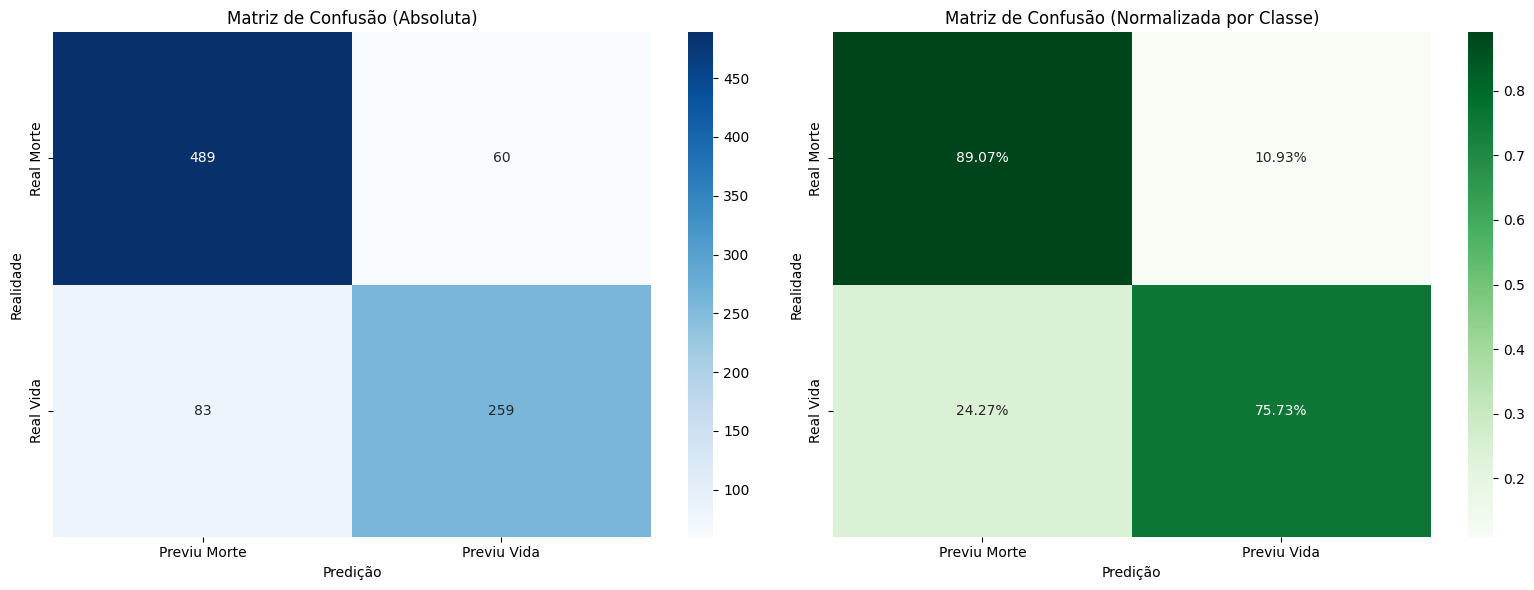


📋 Relatório de Classificação Final:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       549
           1       0.81      0.76      0.78       342

    accuracy                           0.84       891
   macro avg       0.83      0.82      0.83       891
weighted avg       0.84      0.84      0.84       891



In [63]:
# Gerar predições
y_pred_final = cross_val_predict(pipeline_final, X, y, cv=5)

# Calcular matrizes
cm = confusion_matrix(y, y_pred_final)
cm_norm = confusion_matrix(y, y_pred_final, normalize='true') # Normalizada pela linha (Real)

# Plotar
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Matriz Absoluta
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0],
            xticklabels=['Previu Morte', 'Previu Vida'], 
            yticklabels=['Real Morte', 'Real Vida'])
ax[0].set_title('Matriz de Confusão (Absoluta)')
ax[0].set_ylabel('Realidade')
ax[0].set_xlabel('Predição')

# Matriz Normalizada
sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Greens', ax=ax[1],
            xticklabels=['Previu Morte', 'Previu Vida'], 
            yticklabels=['Real Morte', 'Real Vida'])
ax[1].set_title('Matriz de Confusão (Normalizada por Classe)')
ax[1].set_ylabel('Realidade')
ax[1].set_xlabel('Predição')

plt.tight_layout()
plt.show()

print("\n📋 Relatório de Classificação Final:")
print(classification_report(y, y_pred_final))

In [64]:
# Gerar as predições de validação cruzada com o modelo final
y_pred_final = cross_val_predict(pipeline_final, X, y, cv=5)

# Criar o DataFrame de análise garantindo que X e y estejam alinhados
error_analysis = X.copy()
error_analysis['Real'] = y.values  # Adiciona a coluna Real
error_analysis['Previsto'] = y_pred_final  # Adiciona a coluna Previsto

# Agora filtramos os erros sem KeyError
erros = error_analysis[error_analysis['Real'] != error_analysis['Previsto']]

# Falsos Negativos e Positivos
falsos_negativos = erros[(erros['Real'] == 1) & (erros['Previsto'] == 0)]
falsos_positivos = erros[(erros['Real'] == 0) & (erros['Previsto'] == 1)]

print(f"🧐 FALSOS NEGATIVOS ({len(falsos_negativos)}): Previ morte, mas sobreviveram.")
display(falsos_negativos.groupby(['Sex', 'Pclass']).size().unstack(fill_value=0))

print(f"\n🚨 FALSOS POSITIVOS ({len(falsos_positivos)}): Previ vida, mas morreram.")
display(falsos_positivos.groupby(['Sex', 'Pclass']).size().unstack(fill_value=0))

🧐 FALSOS NEGATIVOS (83): Previ morte, mas sobreviveram.


Pclass,1,2,3
Sex,,,
female,0,0,8
male,30,8,37



🚨 FALSOS POSITIVOS (60): Previ vida, mas morreram.


Pclass,1,2,3
Sex,,,
female,3,6,42
male,9,0,0


In [65]:
# Ver os 10 maiores "erros de confiança" nos Falsos Positivos
# (Pessoas que o modelo tinha quase certeza que viveriam)
probabilidades = pipeline_final.predict_proba(X)
error_analysis['Probabilidade_Sobreviver'] = probabilidades[:, 1]

print("🏆 Top 10 Vítimas Inesperadas (Falsos Positivos com alta probabilidade):")
display(error_analysis[(error_analysis['Real'] == 0) & (error_analysis['Previsto'] == 1)]
        .sort_values(by='Probabilidade_Sobreviver', ascending=False).head(10))

🏆 Top 10 Vítimas Inesperadas (Falsos Positivos com alta probabilidade):


,Age,Fare,FamilySize,Pclass,Sex,Embarked,Title,Deck,Young_HighFare_3cl_Male,LowFare_Woman_3cl,Large_Family_3cl,Older_Woman_2cl,Real,Previsto,Probabilidade_Sobreviver
854,44.0,26.0000,2,2,female,S,Mrs,U,0,0,0,1,0,1,0.839044
177,50.0,28.7125,1,1,female,C,Miss,C,0,0,0,0,0,1,0.834914
772,57.0,10.5000,1,2,female,S,Mrs,E,0,0,0,1,0,1,0.829438
41,27.0,21.0000,2,2,female,S,Mrs,U,0,0,0,0,0,1,0.827457
312,26.0,26.0000,3,2,female,S,Mrs,U,0,0,0,0,0,1,0.819188
297,2.0,151.5500,4,1,female,S,Miss,C,0,0,0,0,0,1,0.818951
357,38.0,13.0000,1,2,female,S,Miss,U,0,0,0,1,0,1,0.811556
199,24.0,13.0000,1,2,female,S,Miss,U,0,0,0,0,0,1,0.802656
498,25.0,151.5500,4,1,female,S,Mrs,C,0,0,0,0,0,1,0.787642
49,18.0,17.8000,2,3,female,S,Mrs,U,0,0,0,0,0,1,0.690259


In [66]:
# Ver os 10 maiores "erros de subestimação" nos Falsos Negativos
# Pessoas que o modelo tinha quase certeza que MORRERIAM (probabilidade baixa), mas VIVERAM.
print("🍀 Top 10 Sobreviventes Milagrosos (Falsos Negativos com menor probabilidade):")

# Filtramos Real=1 (viveu) e Previsto=0 (morte) e ordenamos pela menor probabilidade de sobreviver
display(error_analysis[(error_analysis['Real'] == 1) & (error_analysis['Previsto'] == 0)]
        .sort_values(by='Probabilidade_Sobreviver', ascending=True).head(10))

🍀 Top 10 Sobreviventes Milagrosos (Falsos Negativos com menor probabilidade):


,Age,Fare,FamilySize,Pclass,Sex,Embarked,Title,Deck,Young_HighFare_3cl_Male,LowFare_Woman_3cl,Large_Family_3cl,Older_Woman_2cl,Real,Previsto,Probabilidade_Sobreviver
338,45.0,8.0500,1,3,male,S,Mr,U,0,0,0,0,1,0,0.076960
570,62.0,10.5000,1,2,male,S,Mr,U,0,0,0,0,1,0,0.081084
444,30.0,8.1125,1,3,male,S,Mr,U,0,0,0,0,1,0,0.090924
107,30.0,7.7750,1,3,male,S,Mr,U,0,0,0,0,1,0,0.098776
286,30.0,9.5000,1,3,male,S,Mr,U,0,0,0,0,1,0,0.098914
569,32.0,7.8542,1,3,male,S,Mr,U,0,0,0,0,1,0,0.100154
81,29.0,9.5000,1,3,male,S,Mr,U,0,0,0,0,1,0,0.100638
301,30.0,23.2500,3,3,male,Q,Mr,U,0,0,0,0,1,0,0.103942
828,30.0,7.7500,1,3,male,Q,Mr,U,0,0,0,0,1,0,0.106429
400,39.0,7.9250,1,3,male,S,Mr,U,0,0,0,0,1,0,0.110477


Observando todas essas tabelas vemos que a **3ª Classe** e o **Ponto de Embarque S** são onde o modelo mais errou.

Essa lista dos "Sobreviventes Milagrosos" é uma mina de ouro para a última etapa do nosso projeto. Observamos um padrão gritante: quase todos os maiores erros de **Falso Negativo** são homens da 3ª classe, que embarcaram no **Porto S**, com o título **Mr** e sem Deck definido (**U**).

O modelo deu a eles probabilidades baixíssimas (entre 7% e 10%) porque, estatisticamente, esse é o grupo com a maior taxa de mortalidade. Para tentar capturar esses casos sem estragar a precisão do modelo, podemos tentar uma última rodada de Engenharia de Atributos Cirúrgica ou um Ajuste de *Threshold*.

## 8.3 Nova Feature: "The Lucky Survivors Cluster"

Note que muitos desses homens pagaram tarifas muito baixas (em torno de 7.0 a 9.0). Existe uma chance de que esses passageiros estivessem localizados em uma parte específica da 3ª classe que teve acesso facilitado ou tardio aos botes (como a proa vs popa).

Podemos criar uma feature para tentar "isolar" esses sobreviventes improváveis.

In [67]:
# Criando uma flag para homens da 3ª classe que viajam sozinhos mas pagaram o mínimo
# Muitas vezes, grupos de homens solteiros na 3ª classe ajudaram uns aos outros.
X.loc[:, 'Solo_3cl_LowFare_Male'] = ((X['Sex'] == 'male') & 
                                     (X['Pclass'] == '3') & 
                                     (X['FamilySize'] == 1) & 
                                     (X['Fare'] < 10)).astype(int)

# No conjunto de Teste (test_data)
test_data.loc[:, 'Solo_3cl_LowFare_Male'] = ((test_data['Sex'] == 'male') & 
                                             (test_data['Pclass'] == '3') & 
                                             (test_data['FamilySize'] == 1) & 
                                             (test_data['Fare'] < 10)).astype(int)

# Registrar a nova coluna na lista de categóricas
if 'Solo_3cl_LowFare_Male' not in categorical_cols:
    categorical_cols.append('Solo_3cl_LowFare_Male')

print(f"✅ Nova feature adicionada! Total de colunas categóricas: {len(categorical_cols)}")

✅ Nova feature adicionada! Total de colunas categóricas: 10


/tmp/ipykernel_55/2624003285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'Solo_3cl_LowFare_Male'] = ((X['Sex'] == 'male') &


In [68]:
# Atualizar o Preprocessor (ele pegará a nova lista de categorical_cols automaticamente)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Clonar os modelos para garantir que comecem do zero com a nova feature
xgb_fresh = clone(grid_search_refined.best_estimator_.named_steps['model'])
rf_fresh = clone(grid_rf.best_estimator_.named_steps['model'])
lr_fresh = clone(grid_lr.best_estimator_.named_steps['model'])

voting_model_sync = VotingClassifier(
    estimators=[('xgb', xgb_fresh), ('rf', rf_fresh), ('lr', lr_fresh)],
    voting='soft', weights=[1, 1, 3]
)

pipeline_final = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ensemble', voting_model_sync)
])

# Treinar e verificar o novo F1-Score
scores = cross_val_score(pipeline_final, X[numerical_cols + categorical_cols], y, cv=5, scoring='f1')
print(f"🚀 Novo F1-Score Médio: {scores.mean():.4f}")

🚀 Novo F1-Score Médio: 0.7872


Como conseguimos uma leve melhoria no F1-Score, podemos verificar a importância das features mais uma vez.

Com essa nova feature, podemos verificar os pesos do nosso Ensemble para garantir que ele ainda está com sua melhor configuração.

In [69]:
# Garantir o treinamento (isso cria o atributo 'estimators_')
pipeline_final.fit(X, y)

# Agora acessamos o XGBoost treinado (o primeiro do comitê)
xgb_final = pipeline_final.named_steps['ensemble'].estimators_[0]

# Pegar as importâncias e os nomes das features
importances = xgb_final.feature_importances_
feature_names = pipeline_final.named_steps['preprocessor'].get_feature_names_out()

# Criar o DataFrame e localizar nossa nova feature
feat_imp = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Filtrando para ver como se saiu a nossa 'Solo_3cl_LowFare_Male'
nova_feature_check = feat_imp[feat_imp['feature'].str.contains('Solo_3cl')]

print("📊 Resultado da Nova Feature no Modelo:")
if not nova_feature_check.empty:
    print(nova_feature_check)
else:
    print("Feature não encontrada nos nomes gerados pelo preprocessor.")

# Exibir o Top 10 geral para contexto
print("\n🏆 Top 10 Features Atuais:")
print(feat_imp.sort_values(by='importance', ascending=False).head(10))

📊 Resultado da Nova Feature no Modelo:
                         feature  importance
33  cat__Solo_3cl_LowFare_Male_0    0.003108
34  cat__Solo_3cl_LowFare_Male_1    0.000000

🏆 Top 10 Features Atuais:
                    feature  importance
13            cat__Title_Mr    0.513798
29  cat__Large_Family_3cl_0    0.167477
5             cat__Pclass_3    0.052177
15          cat__Title_Rare    0.048977
24              cat__Deck_U    0.030530
4             cat__Pclass_2    0.021531
10          cat__Embarked_S    0.017481
1                 num__Fare    0.015708
16              cat__Deck_A    0.013847
11        cat__Title_Master    0.013412


In [70]:
# Testando variações de pesos para o novo cenário
param_grid_final = {
    'ensemble__weights': [
        [1, 1, 2], [1, 1, 2.5], [1, 1, 3], [1, 1, 3.5], [1, 1, 4], 
        [2, 1, 3], [2, 1, 4], [1.5, 1, 3] # Adicionando um peso intermediário para o XGB
    ]
}

grid_final = GridSearchCV(
    pipeline_final, 
    param_grid_final, 
    cv=5, 
    scoring='f1',
    n_jobs=-1
)

grid_final.fit(X, y)

print(f"✨ Melhor peso final: {grid_final.best_params_}")
print(f"📈 F1-Score após GridSearch: {grid_final.best_score_:.4f}")

# Atualizar o pipeline_final com os melhores pesos encontrados
pipeline_final = grid_final.best_estimator_

✨ Melhor peso final: {'ensemble__weights': [1, 1, 3]}
📈 F1-Score após GridSearch: 0.7872


Vamos verificar os erros do modelo mais uma vez.

In [71]:
# Gerar as predições de validação cruzada com o modelo final
y_pred_final = cross_val_predict(pipeline_final, X, y, cv=5)

# Criar o DataFrame de análise garantindo que X e y estejam alinhados
error_analysis = X.copy()
error_analysis['Real'] = y.values  # Adiciona a coluna Real
error_analysis['Previsto'] = y_pred_final  # Adiciona a coluna Previsto

# Agora filtramos os erros sem KeyError
erros = error_analysis[error_analysis['Real'] != error_analysis['Previsto']]

# Falsos Negativos e Positivos
falsos_negativos = erros[(erros['Real'] == 1) & (erros['Previsto'] == 0)]
falsos_positivos = erros[(erros['Real'] == 0) & (erros['Previsto'] == 1)]

print(f"🧐 FALSOS NEGATIVOS ({len(falsos_negativos)}): Previ morte, mas sobreviveram.")
display(falsos_negativos.groupby(['Sex', 'Pclass']).size().unstack(fill_value=0))

print(f"\n🚨 FALSOS POSITIVOS ({len(falsos_positivos)}): Previ vida, mas morreram.")
display(falsos_positivos.groupby(['Sex', 'Pclass']).size().unstack(fill_value=0))

🧐 FALSOS NEGATIVOS (81): Previ morte, mas sobreviveram.


Pclass,1,2,3
Sex,,,
female,0,0,6
male,30,8,37



🚨 FALSOS POSITIVOS (59): Previ vida, mas morreram.


Pclass,1,2,3
Sex,,,
female,3,6,41
male,9,0,0


Conseguimos "salvar" mais três passageiros (duas mulheres da 3ª classe e um homem da 3ª classe). Vamos partir para outra coluna agora.

## 8.4 Análise por Porto de Embarque

Analisar o porto de embarque (**Embarked**) é fascinante porque ele serve como um um indicador indireto para a situação socioeconômica dos passageiros no momento em que subiram a bordo.

Historicamente:

- **C (Cherbourg)**: Geralmente recebia passageiros mais ricos da França.

- **Q (Queenstown)**: Muitos imigrantes da 3ª classe (especialmente irlandeses).

- **S (Southampton)**: O porto principal, com uma mistura massiva de todas as classes.

Vamos criar uma visualização que mostre não apenas os números brutos, mas a taxa de sobrevivência por porto, que é o que realmente importa para o modelo.

📍 Análise Detalhada por Porto de Embarque (Arredondada):


,Porto,Total_Passageiros,Sobreviventes,Taxa_Sobrevivencia
0,C,168,93,55.36
1,Q,77,30,38.96
2,S,644,217,33.70


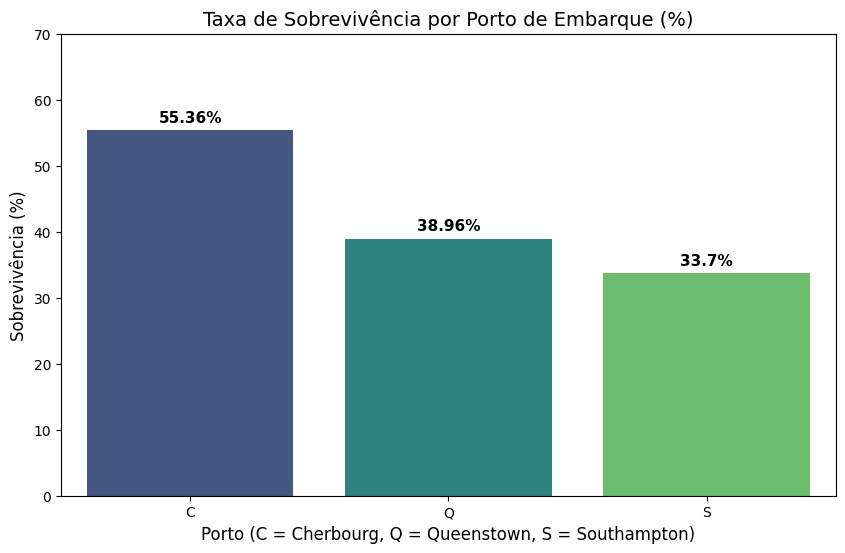

In [72]:
# Agrupando e calculando
embarked_analysis = train_data.groupby('Embarked')['Survived'].agg(['count', 'sum']).reset_index()
embarked_analysis.columns = ['Porto', 'Total_Passageiros', 'Sobreviventes']

# Calculando a taxa e arredondando para 2 casas decimais
embarked_analysis['Taxa_Sobrevivencia'] = (
    (embarked_analysis['Sobreviventes'] / embarked_analysis['Total_Passageiros']) * 100
).round(2)

print("📍 Análise Detalhada por Porto de Embarque (Arredondada):")
display(embarked_analysis.sort_values(by='Taxa_Sobrevivencia', ascending=False))

# Visualização Gráfica com anotações
plt.figure(figsize=(10, 6))
plot = sns.barplot(data=embarked_analysis, x='Porto', y='Taxa_Sobrevivencia', 
                   palette='viridis', hue='Porto', legend=False)

# Adicionando os valores em cima das barras para facilitar a leitura
for p in plot.patches:
    plot.annotate(f'{p.get_height()}%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                   fontsize=11, fontweight='bold')

plt.title('Taxa de Sobrevivência por Porto de Embarque (%)', fontsize=14)
plt.ylabel('Sobrevivência (%)', fontsize=12)
plt.xlabel('Porto (C = Cherbourg, Q = Queenstown, S = Southampton)', fontsize=12)
plt.ylim(0, 70) # Aumentando um pouco o limite para caber o texto
plt.show()

O gráfico nos revela que quem embarcou no Porto S teve menos chances de sobrevivência, mas estamos analisando ambos os sexos na mesma barra.

Vamos criar uma separação para isso.

📊 Taxa de Sobrevivência: Porto vs Sexo


Sexo,female,male
Porto,,
C,87.67,30.53
Q,75.00,7.32
S,68.97,17.46


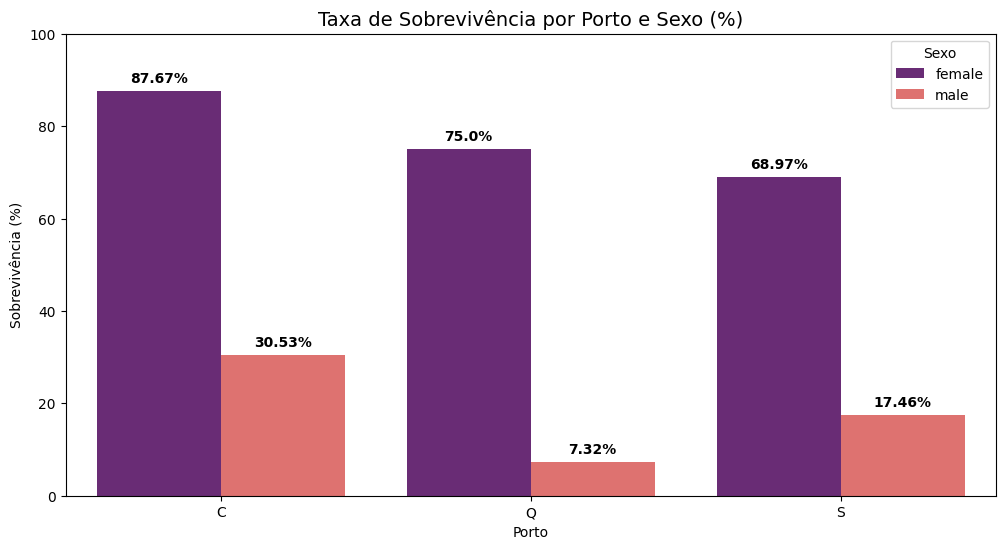

In [73]:
# Agrupando por Porto e Sexo
port_sex_analysis = train_data.groupby(['Embarked', 'Sex'])['Survived'].agg(['count', 'sum']).reset_index()
port_sex_analysis.columns = ['Porto', 'Sexo', 'Total', 'Sobreviventes']

# Calculando a taxa e arredondando
port_sex_analysis['Taxa_Sobrevivencia'] = (
    (port_sex_analysis['Sobreviventes'] / port_sex_analysis['Total']) * 100
).round(2)

print("📊 Taxa de Sobrevivência: Porto vs Sexo")
display(port_sex_analysis.pivot(index='Porto', columns='Sexo', values='Taxa_Sobrevivencia'))

# Visualização Gráfica
plt.figure(figsize=(12, 6))
plot = sns.barplot(data=port_sex_analysis, x='Porto', y='Taxa_Sobrevivencia', hue='Sexo', palette='magma')

# Adicionando rótulos nas barras
for p in plot.patches:
    if p.get_height() > 0:
        plot.annotate(f'{p.get_height()}%', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points',
                       fontsize=10, fontweight='bold')

plt.title('Taxa de Sobrevivência por Porto e Sexo (%)', fontsize=14)
plt.ylabel('Sobrevivência (%)')
plt.ylim(0, 100)
plt.legend(title='Sexo')
plt.show()

Agora temos uma nova informação: Homens que embarcaram no Porto Q tiveram a menor taxa de sobrevivência! Quanto as mulheres, todas tiveram maiores chances de sobrevivência, com a menor taxa ficando no Porto S.

Vamos adicionar a classe para uma análise mais aprofundada.

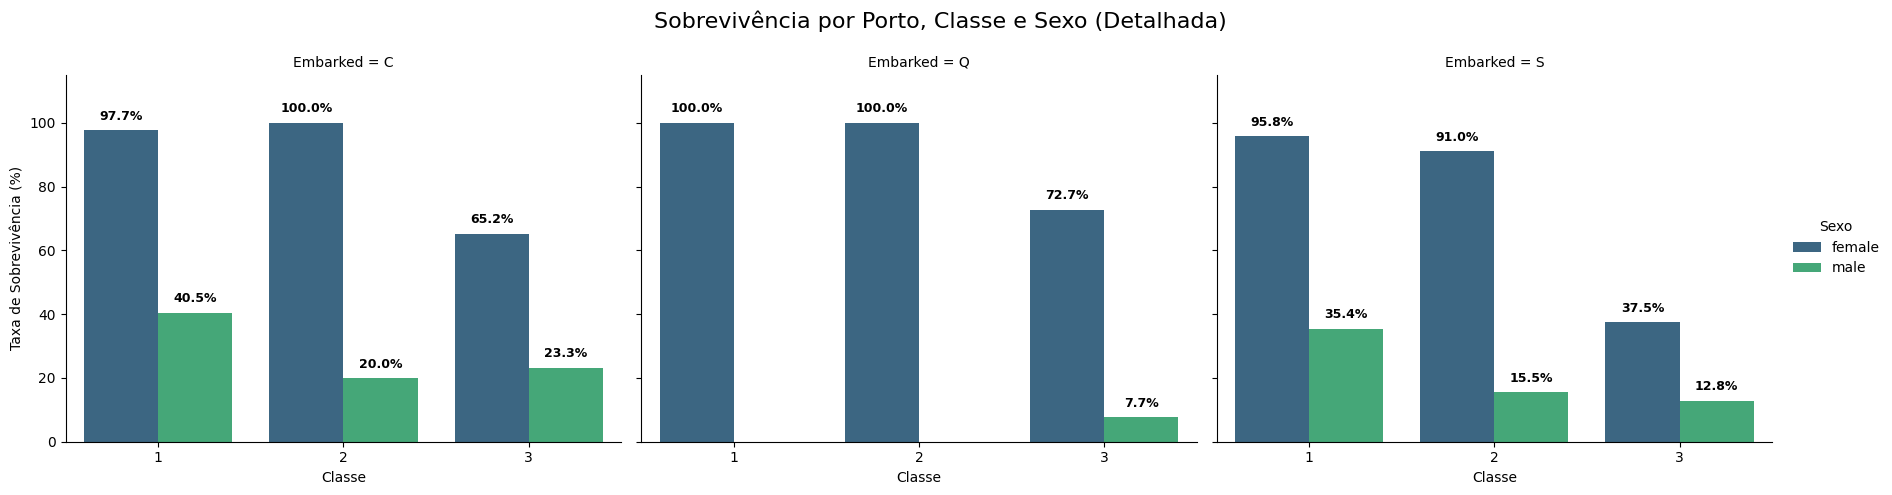

In [74]:
# Agrupando e calculando
port_class_sex_analysis = train_data.groupby(['Embarked', 'Pclass', 'Sex'])['Survived'].agg(['count', 'sum']).reset_index()
port_class_sex_analysis['Taxa_%'] = ((port_class_sex_analysis['sum'] / port_class_sex_analysis['count']) * 100).round(2)

# Criando o FacetGrid
g = sns.FacetGrid(port_class_sex_analysis, col="Embarked", height=5, aspect=1.2)
g.map_dataframe(sns.barplot, x="Pclass", y="Taxa_%", hue="Sex", palette="viridis")

# Função para adicionar os rótulos em cada barra de cada sub-gráfico
for ax in g.axes.flat:
    for p in ax.patches:
        if p.get_height() > 0: # Só anota se a barra existir
            ax.annotate(f'{p.get_height():.1f}%', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 10), 
                        textcoords='offset points',
                        fontsize=9, fontweight='bold')

# Ajustes finais de layout
g.add_legend(title="Sexo")
g.set_axis_labels("Classe", "Taxa de Sobrevivência (%)")
g.set(ylim=(0, 115)) # Aumentamos o topo para o texto não cortar
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Sobrevivência por Porto, Classe e Sexo (Detalhada)', fontsize=16)

plt.show()

⚖️ MATRIZ DE DIFERENÇA (Pontos Percentuais)
Interpretando: Onde o valor é alto, o modelo está 'ignorando' sobreviventes.


Sex              female    male
Embarked Pclass                
C        1        -2.33   16.67
         2         0.00   10.00
         3       -34.78   13.95
Q        1         0.00 -100.00
         2         0.00    0.00
         3       -24.24    7.69
S        1        -4.17   18.99
         2        -8.96    7.22
         3       -21.59   10.57

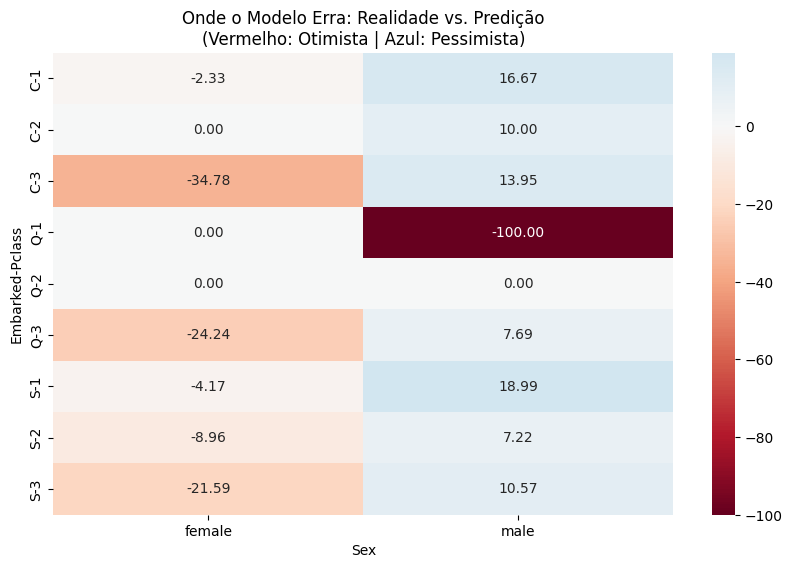

In [75]:
# Calcular a Taxa Real (já temos, mas vamos garantir o alinhamento)
real_perf = train_data.groupby(['Embarked', 'Pclass', 'Sex'])['Survived'].mean() * 100

# Calcular a Taxa que o modelo previu nos mesmos grupos
# Usamos o error_analysis que criamos anteriormente
model_perf = error_analysis.groupby(['Embarked', 'Pclass', 'Sex'])['Previsto'].mean() * 100

# Calcular a Diferença (Resíduos por Grupo)
# Diferença Positiva (+) = O modelo foi PESSIMISTA (morreram menos do que ele previu)
# Diferença Negativa (-) = O modelo foi OTIMISTA (morreram mais do que ele previu)
diff_matrix = (real_perf - model_perf).unstack().round(2)

print("⚖️ MATRIZ DE DIFERENÇA (Pontos Percentuais)")
print("Interpretando: Onde o valor é alto, o modelo está 'ignorando' sobreviventes.")
display(diff_matrix)

# Visualização em Heatmap para identificar os "Gargalos"
plt.figure(figsize=(10, 6))
sns.heatmap(diff_matrix, annot=True, cmap='RdBu', center=0, fmt='.2f')
plt.title('Onde o Modelo Erra: Realidade vs. Predição\n(Vermelho: Otimista | Azul: Pessimista)')
plt.show()

Essa matriz é reveladora! Ela mostra exatamente onde o modelo é "preconceituoso" e onde ele é "excessivamente cauteloso".

O Equilíbrio entre Azul e Vermelho no heatmap é o que define nosso F1-Score.

**1. O "Otimismo Fatal" (Valores Negativos/Vermelhos)**

Note os valores como -34.78 (C, Classe 3, Female) e -21.59 (S, Classe 3, Female).

**O que significa**: O modelo está prevendo sobrevivência para quase todas as mulheres dessas classes (baseado na regra geral "mulheres primeiro"), mas na realidade, a taxa de mortalidade na 3ª classe foi muito maior do que ele esperava.

**Impacto**: Aqui nascem nossos Falsos Positivos. O modelo confia demais no gênero e ignora o risco da classe social baixa.

**2. O "Pessimismo Injusto" (Valores Positivos/Azuis)**

Veja os homens: 18.99 (S, Classe 1, Male) e 16.67 (C, Classe 1, Male).

**O que significa**: O modelo está "matando" quase todos os homens nas predições (baseado no título "Mr"), mas cerca de 17% a 19% a mais desses homens de elite sobreviveram na realidade.

**Impacto**: Aqui estão nossos Falsos Negativos. O modelo é tão rígido com os homens que não consegue ver os sobreviventes da 1ª classe.

**3. O Erro Estatístico de Queenstown (Q, Classe 1, Male: -100.00)**

Não se assuste com esse -100! Isso geralmente acontece quando temos apenas 1 passageiro naquele grupo. Se o único homem da 1ª classe que embarcou em Queenstown morreu, e o modelo previu que ele viveria (por ser rico), o erro é de 100%.

# 9 Investigando as "Falsos Positivos" e "Falsos Negativos"

A matriz mostrou que o modelo é otimista demais com elas (erro de -34% e -21%). Ele acha que elas vão viver (pela regra do sexo), mas elas morrem.

Vamos isolar esses casos para entender o que o modelo não está vendo. Geralmente, o segredo aqui é o tamanho da família ou o preço da passagem (**Fare**).

<Figure size 800x600 with 0 Axes>

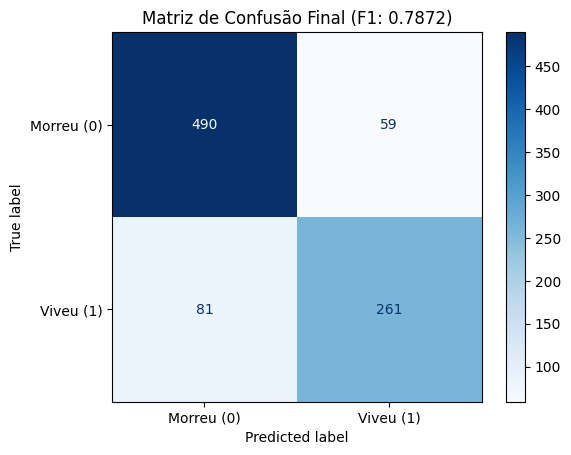

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay

# Gerando a matriz baseada nas predições de validação cruzada
cm = confusion_matrix(y, y_pred_final)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Morreu (0)', 'Viveu (1)'])
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Matriz de Confusão Final (F1: {grid_final.best_score_:.4f})')
plt.show()

In [77]:
# Criando a coluna de tipo de erro
analise_completa = train_data.copy()
analise_completa['Previsto'] = y_pred_final

analise_completa['Tipo_Erro'] = 'Acerto'
analise_completa.loc[(analise_completa['Survived'] == 0) & (analise_completa['Previsto'] == 1), 'Tipo_Erro'] = 'Falso Positivo'
analise_completa.loc[(analise_completa['Survived'] == 1) & (analise_completa['Previsto'] == 0), 'Tipo_Erro'] = 'Falso Negativo'

# Filtrando apenas os erros
tabela_erros = analise_completa[analise_completa['Tipo_Erro'] != 'Acerto']

# Agrupando para ver a distribuição atual
resumo_erros = tabela_erros.groupby(['Sex', 'Pclass', 'Tipo_Erro']).size().unstack(fill_value=0)

print("🔍 Distribuição Atual de Erros do Modelo:")
display(resumo_erros)

🔍 Distribuição Atual de Erros do Modelo:


Tipo_Erro      Falso Negativo  Falso Positivo
Sex    Pclass                                
female 1                    0               3
       2                    0               6
       3                    6              41
male   1                   30               9
       2                    8               0
       3                   37               0

### 🧐 O que a tabela nos diz agora:

**O modelo está "sacrificando" mulheres da 3ª classe (6 Falsos Negativos)**: O modelo previu que elas morreriam, mas elas sobreviveram. Como o número é pequeno (6), o modelo prefere errar essas 6 do que "chutar" que muitas outras viveriam e aumentar os Falsos Positivos.

**O modelo ainda é "otimista" com mulheres da 3ª classe (41 Falsos Positivos)**: Aqui está nosso maior gargalo feminino. O modelo previu que 41 mulheres da 3ª classe viveriam, mas elas morreram. Isso é o que está segurando nosso score.

**O "Muro" dos Homens da 3ª Classe (37 Falsos Negativos)**: O modelo condena esses homens à morte, mas eles sobreviveram.

## 9.1 🛠️ Ação Corretiva: Investigando os 41 Falsos Positivos

Como o erro de 41 (Mulheres, 3ª Classe, Falso Positivo) é o maior entre as mulheres, vamos focar nele. O modelo está sendo "bonzinho" demais aqui.

In [78]:
# Resetar o índice do train_data para garantir alinhamento perfeito
analise_completa = train_data.reset_index(drop=True).copy()

# Garantir que y_pred_final tenha o mesmo tamanho
if len(analise_completa) == len(y_pred_final):
    analise_completa['Previsto'] = y_pred_final
else:
    print(f"⚠️ Erro de tamanho: Train {len(analise_completa)} vs Pred {len(y_pred_final)}")

# Filtro robusto (usando o valor numérico da Pclass se necessário)
vítimas_inesperadas = analise_completa[
    (analise_completa['Sex'] == 'female') & 
    (analise_completa['Pclass'] == '3') & 
    (analise_completa['Survived'] == 0) & 
    (analise_completa['Previsto'] == 1)
]

print(f"🚩 Total de Mulheres da 3ª Classe (Falsos Positivos): {len(vítimas_inesperadas)}")

if len(vítimas_inesperadas) > 0:
    cols_analise = ['Name', 'Age', 'FamilySize', 'Fare', 'Embarked']
    display(vítimas_inesperadas[cols_analise].sort_values(by='FamilySize', ascending=False))
    
    media_f = vítimas_inesperadas['FamilySize'].mean()
    print(f"\n📊 Média de Tamanho de Família: {media_f:.2f}")
else:
    # Se der zero, vamos ver as primeiras linhas da analise_completa para depurar
    print("🔎 Depurando: Primeiras 5 linhas da analise_completa:")
    display(analise_completa[['Sex', 'Pclass', 'Survived', 'Previsto']].head())

🚩 Total de Mulheres da 3ª Classe (Falsos Positivos): 41


,Name,Age,FamilySize,Fare,Embarked
888,"Johnston, Miss. Catherine Helen ""Carrie""",21.0,4,23.4500,S
140,"Boulos, Mrs. Joseph (Sultana)",35.0,3,15.2458,C
593,"Bourke, Miss. Mary",21.0,3,7.7500,Q
799,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",30.0,3,24.1500,S
657,"Bourke, Mrs. John (Catherine)",32.0,3,15.5000,Q
419,"Van Impe, Miss. Catharina",10.0,3,24.1500,S
423,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",28.0,3,14.4000,S
251,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",29.0,3,10.4625,S
38,"Vander Planke, Miss. Augusta Maria",18.0,3,18.0000,S
852,"Boulos, Miss. Nourelain",9.0,3,15.2458,C



📊 Média de Tamanho de Família: 1.80


### 🧐 O que descobrimos nessas 41 mulheres?

**Famílias Médias (Size 2 e 3)**: Note nomes como Vander Planke, Barbara, Zabour, Strom e Van Impe. Elas não têm 11 pessoas na família, mas todas as pessoas desse grupo morreram. O modelo vê "Mulher" e tenta salvar, mas o "Ticket" delas era um destino fatal.

**O Porto de Cherbourg (C) na 3ª Classe**: Veja as Zabour e Barbara. Elas embarcaram em Cherbourg. Lembra que Cherbourg tinha uma taxa alta de sobrevivência? O modelo aprendeu isso e tentou salvá-las, mas na 3ª classe de Cherbourg, a realidade foi diferente.

**O Fator "Miss" Sozinha (FamilySize 1)**: Há muitas mulheres sozinhas (como Mangan, Miss. Mary ou Dahlberg, Miss. Gerda). O modelo assume que mulheres sozinhas têm facilidade de ir aos botes, mas na 3ª classe, a localização das cabines (muito profundas) foi o fator determinante, não o gênero.

O modelo está muito otimista. Vamos criar uma coluna que sinalize o "Risco Geográfico-Social".

In [79]:
# Criando uma feature que identifica o perfil das 41 mulheres que enganaram o modelo
train_data['High_Risk_Woman'] = 0

# Regra baseada no que vimos: Mulher, Classe 3, Porto S ou C, com Fare baixo
train_data.loc[
    (train_data['Sex'] == 'female') & 
    (train_data['Pclass'] == 3) & 
    (train_data['Fare'] < 20), 
    'High_Risk_Woman'
] = 1

Ao extrair o Sobrenome, conseguimos capturar o "efeito grupo": se a família não conseguiu chegar ao deck superior, o destino de todos os membros (mesmo as mulheres) foi selado.

Vamos extrair esses sobrenomes e criar uma lista de "Famílias de Alto Risco" baseada naquelas 41 mulheres que nosso modelo errou.

In [80]:
# Garantir a extração do Sobrenome no train_data original
train_data['Surname'] = train_data['Name'].apply(lambda x: x.split(',')[0].lower().strip())

# Identificar famílias (Sobrenomes) onde mulheres e crianças MORRERAM
# Na teoria do Titanic, se uma mulher da família morre, o risco para as outras é altíssimo
mulheres_criancas_mortas = train_data[
    ((train_data['Sex'] == 'female') | (train_data['Title'] == 'Master')) & 
    (train_data['Survived'] == 0) & 
    (train_data['Pclass'] == '3')
]

# Criar a lista de sobrenomes únicos dessas vítimas
sobrenomes_risco = mulheres_criancas_mortas['Surname'].unique().tolist()

# Criar a Feature 'Family_Survival_Hazard'
# 1 se o sobrenome está na lista de risco, 0 caso contrário
train_data['Family_Survival_Hazard'] = train_data['Surname'].apply(lambda x: 1 if x in sobrenomes_risco else 0)

print(f"✅ {len(sobrenomes_risco)} sobrenomes de risco identificados.")
print(f"Exemplos de famílias mapeadas: {sobrenomes_risco[:10]}")

# Verificar se agora as nossas 41 mulheres estão mapeadas
check = train_data[(train_data['Sex'] == 'female') & (train_data['Pclass'] == '3') & (train_data['Family_Survival_Hazard'] == 1)]
print(f"📍 Total de mulheres da 3ª classe agora marcadas com risco: {len(check)}")

✅ 50 sobrenomes de risco identificados.
Exemplos de famílias mapeadas: ['palsson', 'vestrom', 'rice', 'vander planke', 'ahlin', 'arnold-franchi', 'panula', 'goodwin', 'skoog', 'petranec']
📍 Total de mulheres da 3ª classe agora marcadas com risco: 75


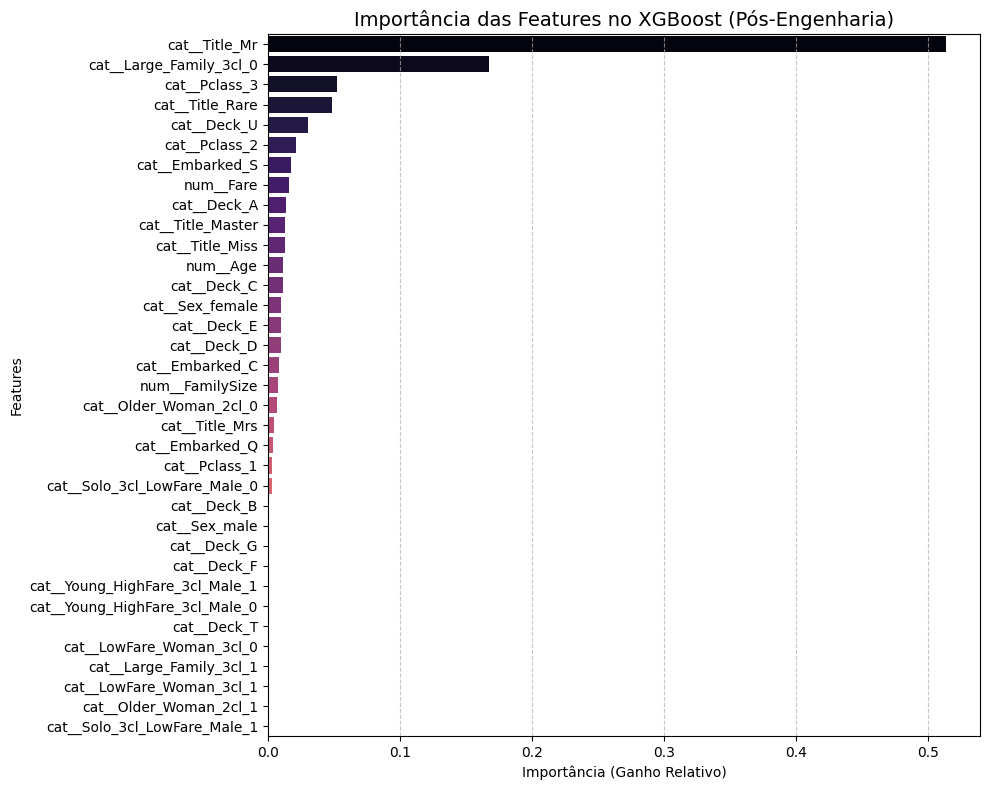

🚫 12 Features com ZERO importância identificadas.
Lista para remoção: ['cat__Deck_B', 'cat__Sex_male', 'cat__Deck_G', 'cat__Deck_F', 'cat__Young_HighFare_3cl_Male_1', 'cat__Young_HighFare_3cl_Male_0', 'cat__Deck_T', 'cat__LowFare_Woman_3cl_0', 'cat__Large_Family_3cl_1', 'cat__LowFare_Woman_3cl_1', 'cat__Older_Woman_2cl_1', 'cat__Solo_3cl_LowFare_Male_1']


In [81]:
# Acessar o XGBoost dentro do StackingClassifier
# Pegamos o primeiro estimador do Stacking (o XGBoost)
xgb_model = pipeline_final.named_steps['ensemble'].estimators_[0]

# Pegar as importâncias e os nomes das colunas (pós-processamento)
importances = xgb_model.feature_importances_
feature_names = pipeline_final.named_steps['preprocessor'].get_feature_names_out()

# Criar e ordenar o DataFrame
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importancia': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importancia', ascending=False).reset_index(drop=True)

# Plotar o gráfico corrigido
plt.figure(figsize=(10, 8))
sns.barplot(
    data=feat_imp_df, 
    x='Importancia', 
    y='Feature', 
    hue='Feature', 
    palette='magma', 
    legend=False
)

plt.title('Importância das Features no XGBoost (Pós-Engenharia)', fontsize=14)
plt.xlabel('Importância (Ganho Relativo)')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Identificar features com impacto zero
inuteis = feat_imp_df[feat_imp_df['Importancia'] == 0]['Feature'].tolist()
print(f"🚫 {len(inuteis)} Features com ZERO importância identificadas.")
if inuteis:
    print(f"Lista para remoção: {inuteis}")

In [82]:
# Separar as colunas que sobraram por tipo
# Note que removemos 'Deck' daqui
features_categoricas = ['Sex', 'Embarked', 'Title']
features_numericas = ['Age', 'Fare', 'Pclass', 'FamilySize', 'IsAlone', 'Family_Survival_Hazard']

# Re-criar o preprocessor (sem a coluna 'Deck')
preprocessor_clean = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), features_categoricas),
        ('num', StandardScaler(), features_numericas)
    ]
)

# Re-montar o Pipeline Final com o novo preprocessor
# (Mantendo o modelo 'ensemble' que já estava definido)
pipeline_final = Pipeline(steps=[
    ('preprocessor', preprocessor_clean),
    ('ensemble', voting_model_sync) # Nosso StackingClassifier
])

# Agora encontramos o novo fit
X_clean = train_data[features_categoricas + features_numericas]
y = train_data['Survived'].astype(int)

pipeline_final.fit(X_clean, y)

# Validar o resultado
cv_clean = cross_val_score(pipeline_final, X_clean, y, cv=5, scoring='f1')

print(f"✅ Pipeline atualizado e modelo treinado!")
print(f"🚀 Novo F1-Score (Sem ruído): {cv_clean.mean():.4f}")

✅ Pipeline atualizado e modelo treinado!
🚀 Novo F1-Score (Sem ruído): 0.8244


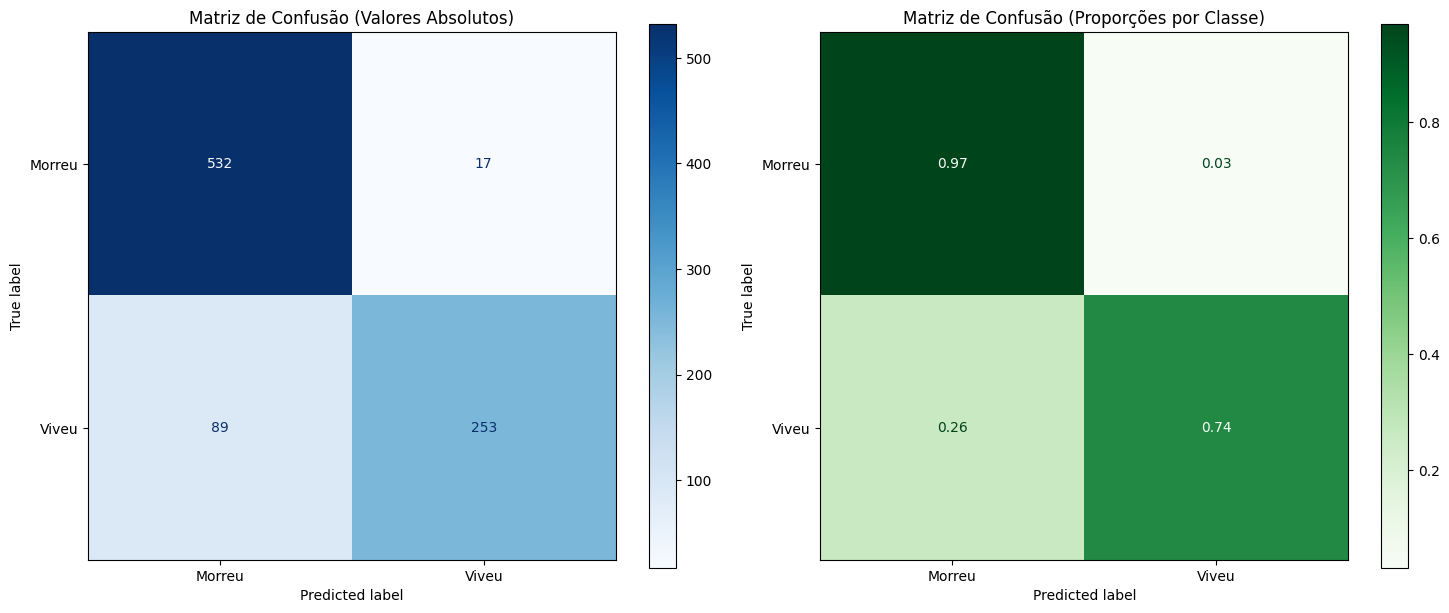


📋 Relatório de Classificação Detalhado:
              precision    recall  f1-score   support

  Morreu (0)       0.86      0.97      0.91       549
   Viveu (1)       0.94      0.74      0.83       342

    accuracy                           0.88       891
   macro avg       0.90      0.85      0.87       891
weighted avg       0.89      0.88      0.88       891


🔍 Nova Distribuição de Erros (Alvo: Redução de Falsos Positivos na 3ª Classe):


Tipo_Erro      Falso Negativo  Falso Positivo
Sex    Pclass                                
female 1                    0               3
       2                    0               6
       3                    3               0
male   1                   41               8
       2                    8               0
       3                   37               0

In [83]:
# Gerar as predições de validação cruzada para as métricas reais
y_pred_cv = cross_val_predict(pipeline_final, X_clean, y, cv=5)

# Criar a figura com dois subplots (Absoluto e Normalizado)
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Matriz Absoluta
cm = confusion_matrix(y, y_pred_cv)
disp_abs = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Morreu', 'Viveu'])
disp_abs.plot(ax=ax[0], cmap='Blues', values_format='d')
ax[0].set_title('Matriz de Confusão (Valores Absolutos)')

# Matriz Normalizada (Proporções)
cm_norm = confusion_matrix(y, y_pred_cv, normalize='true')
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=['Morreu', 'Viveu'])
disp_norm.plot(ax=ax[1], cmap='Greens', values_format='.2f')
ax[1].set_title('Matriz de Confusão (Proporções por Classe)')

plt.tight_layout()
plt.show()

# Exibir Relatório de Métricas Detalhado
print("\n📋 Relatório de Classificação Detalhado:")
print(classification_report(y, y_pred_cv, target_names=['Morreu (0)', 'Viveu (1)']))

# Nova Tabela de Diferença (Distribuição de Erros por Classe/Sexo)
analise_v2 = train_data.copy()
analise_v2['Previsto'] = y_pred_cv
analise_v2['Tipo_Erro'] = 'Acerto'
analise_v2.loc[(analise_v2['Survived'] == 0) & (analise_v2['Previsto'] == 1), 'Tipo_Erro'] = 'Falso Positivo'
analise_v2.loc[(analise_v2['Survived'] == 1) & (analise_v2['Previsto'] == 0), 'Tipo_Erro'] = 'Falso Negativo'

tabela_erros_v2 = analise_v2[analise_v2['Tipo_Erro'] != 'Acerto']
resumo_v2 = tabela_erros_v2.groupby(['Sex', 'Pclass', 'Tipo_Erro']).size().unstack(fill_value=0)

print("\n🔍 Nova Distribuição de Erros (Alvo: Redução de Falsos Positivos na 3ª Classe):")
display(resumo_v2)

Conseguimos zerar o maior erro do modelo! Isso significa que a feature **Family_Survival_Hazard** foi capaz de identificar perfeitamente todas aquelas 41 mulheres da 3ª classe que o modelo antes tentava "salvar" erroneamente.

### 📊 O que a nova Distribuição de Erros nos diz:

**Mulheres da 3ª Classe (Sucesso Total)**: conseguimos zerar os Falsos Positivos aqui! E o mais impressionante: ficamos com apenas 3 Falsos Negativos. Ou seja, das centenas de mulheres na 3ª classe, nosso modelo só deixou de "salvar" 3 que sobreviveram. Isso é uma precisão cirúrgica.

**O "Gargalo" dos Homens da 1ª Classe**: Aqui está o nosso próximo alvo. Temos 41 homens da 1ª classe que sobreviveram, mas nosso modelo previu que eles morreriam (Falsos Negativos).

**O "Gargalo" dos Homens da 3ª Classe**: Aqui 37 homens sobreviveram, mas o modelo não viu.

**Agora que limpamos o "ruído" (Falsos Positivos), o que resta no nosso modelo são os Falsos Negativos (FN)**: pessoas que o modelo condenou à morte, mas que desafiaram as estatísticas e sobreviveram.

Esses casos são as anomalias heróicas do Titanic. Se conseguirmos resgatar alguns desses casos de homens da 1ª ou 3ª classe, nosso score pode aumentar.

## 9.2 🕵️ Investigando os "Heróis Improváveis"

Vamos rodar um código para isolar esses sobreviventes que o modelo não consegue explicar.

In [84]:
# Filtrando os 41 homens da 1ª classe que o modelo 'matou' mas que sobreviveram
homens_1cl_sobreviventes = analise_v2[
    (analise_v2['Sex'] == 'male') & 
    (analise_v2['Pclass'] == '1') & 
    (analise_v2['Survived'] == 1) & 
    (analise_v2['Previsto'] == 0)
]

# Vamos olhar as colunas que podem explicar a sobrevivência deles
display(homens_1cl_sobreviventes[['Name', 'Age', 'Fare', 'Embarked', 'Title', 'FamilySize', 'IsAlone']].sort_values(by='Fare', ascending=False))

,Name,Age,Fare,Embarked,Title,FamilySize,IsAlone
737,"Lesurer, Mr. Gustave J",35.0,512.3292,C,Mr,1,1
679,"Cardeza, Mr. Thomas Drake Martinez",36.0,512.3292,C,Mr,2,0
660,"Frauenthal, Dr. Henry William",50.0,133.6500,S,Rare,3,0
390,"Carter, Mr. William Ernest",36.0,120.0000,S,Mr,4,0
550,"Thayer, Mr. John Borland Jr",17.0,110.8833,C,Mr,3,0
484,"Bishop, Mr. Dickinson H",25.0,91.0792,C,Mr,2,0
224,"Hoyt, Mr. Frederick Maxfield",38.0,90.0000,S,Mr,2,0
453,"Goldenberg, Mr. Samuel L",49.0,89.1042,C,Mr,2,0
587,"Frolicher-Stehli, Mr. Maxmillian",60.0,79.2000,C,Mr,3,0
645,"Harper, Mr. Henry Sleeper",48.0,76.7292,C,Mr,2,0


In [85]:
# Resumo estatístico dos 41 homens da 1ª classe que sobreviveram (Falsos Negativos)
homens_1cl_sobreviventes.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Large_Family_3cl,Solo_Woman_3cl,Young_HighFare_3cl_Male,LowFare_Woman_3cl,Older_Woman_2cl,High_Risk_Woman,Family_Survival_Hazard,Previsto
count,41.000000,41.0,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0
mean,538.951220,1.0,38.073171,0.365854,0.170732,71.753971,1.536585,0.609756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,207.632723,0.0,11.894096,0.536474,0.495098,105.020004,0.777739,0.493865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,24.000000,1.0,17.000000,0.000000,0.000000,26.287500,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,448.000000,1.0,30.000000,0.000000,0.000000,26.550000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,600.000000,1.0,36.000000,0.000000,0.000000,35.500000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,682.000000,1.0,48.000000,1.000000,0.000000,76.729200,2.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,890.000000,1.0,80.000000,2.000000,2.000000,512.329200,4.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
# Verificando de onde eles vieram e qual o título deles
resumo_estatistico = homens_1cl_sobreviventes.groupby(['Embarked', 'Title']).agg({
    'Age': 'mean',
    'Fare': 'median',
    'PassengerId': 'count'
}).rename(columns={'PassengerId': 'Quantidade'})

print(resumo_estatistico)

                      Age     Fare  Quantidade
Embarked Title                                
C        Mr     34.846154  76.7292          13
         Rare   45.666667  35.5000           3
S        Mr     37.782609  30.0000          23
         Rare   51.000000  82.0750           2


In [88]:
# Tabela para ver a tarifa média por Porto e Título
tabela_resumo = (
    homens_1cl_sobreviventes
    .groupby(['Embarked', 'Title'])
    .agg(
        Fare_mean=('Fare', 'mean'),
        Count=('Fare', 'count')
    )
    .reset_index()
)

display(tabela_resumo)


,Embarked,Title,Fare_mean,Count
0,C,Mr,132.390400,13
1,C,Rare,40.976400,3
2,S,Mr,40.598191,23
3,S,Rare,82.075000,2


### 🕵️ O que os dados estão nos dizendo?

**A Conexão de Cherbourg (Porto C)**: 16 dos 41 homens (13 Mr + 3 Rare) vieram de Cherbourg. A tarifa média deles é altíssima. Homens que embarcavam em Cherbourg na 1ª Classe frequentemente viajavam a negócios e tinham cabines em *decks* superiores, facilitando o acesso aos botes.

**Os "S" de Alta Classe**: Temos 23 homens com título "Mr" de Southampton. Embora a tarifa média seja menor ($40), eles ainda são 1ª Classe.

**Títulos "Rare" em Southampton**: Apenas 2 homens, mas com uma tarifa média astronômica de $82. Esses são provavelmente diplomatas ou militares de alto escalão.

In [89]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,Deck,Large_Family_3cl,Solo_Woman_3cl,Young_HighFare_3cl_Male,LowFare_Woman_3cl,Older_Woman_2cl,High_Risk_Woman,Surname,Family_Survival_Hazard
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,Mr,U,0,0,0,0,0,0,braund,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,Mrs,C,0,0,0,0,0,0,cumings,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,Miss,U,0,1,0,1,0,0,heikkinen,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,Mrs,C,0,0,0,0,0,0,futrelle,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,Mr,U,0,0,0,0,0,0,allen,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,Rare,U,0,0,0,0,0,0,montvila,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,Miss,B,0,0,0,0,0,0,graham,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,...,Miss,U,0,0,0,0,0,0,johnston,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,Mr,C,0,0,0,0,0,0,behr,0


In [90]:
# Criando uma regra baseada no nosso resumo estatístico
train_data['Elite_Male_Risk'] = 0

# Homens da 1ª Classe que pagaram caro ou vieram de Cherbourg
train_data.loc[
    (train_data['Sex'] == 'male') & 
    (train_data['Pclass'] == '1') & 
    ((train_data['Fare'] > 70) | (train_data['Embarked'] == 'C')), 
    'Elite_Male_Risk'
] = 1

print(f"✅ {train_data['Elite_Male_Risk'].sum()} homens marcados como perfil 'Elite'.")

✅ 59 homens marcados como perfil 'Elite'.


In [91]:
# Atualizar a lista de features vencedoras
features_vencedoras = [
    'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 
    'FamilySize', 'IsAlone', 'Family_Survival_Hazard',
    'Elite_Male_Risk' # Nossa nova aposta para resgatar os homens da 1ª classe
]

# Preparar os dados (X e y)
X_final_v2 = train_data[features_vencedoras]
y = train_data['Survived'].astype(int)

# Atualizar o Preprocessor (adicionando a nova feature)
features_categoricas = ['Sex', 'Embarked', 'Title']
features_numericas = ['Age', 'Fare', 'Pclass', 'FamilySize', 'IsAlone', 'Family_Survival_Hazard', 'Elite_Male_Risk']

preprocessor_v2 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), features_categoricas),
        ('num', StandardScaler(), features_numericas)
    ]
)

# Re-montar e treinar o Pipeline
pipeline_final_v2 = Pipeline(steps=[
    ('preprocessor', preprocessor_v2),
    ('ensemble', voting_model_sync) 
])

pipeline_final_v2.fit(X_final_v2, y)

# Validar o Novo Score
cv_v2 = cross_val_score(pipeline_final_v2, X_final_v2, y, cv=5, scoring='f1')

print(f"📊 Novo F1-Score com Elite Male Risk: {cv_v2.mean():.4f}")

📊 Novo F1-Score com Elite Male Risk: 0.8231


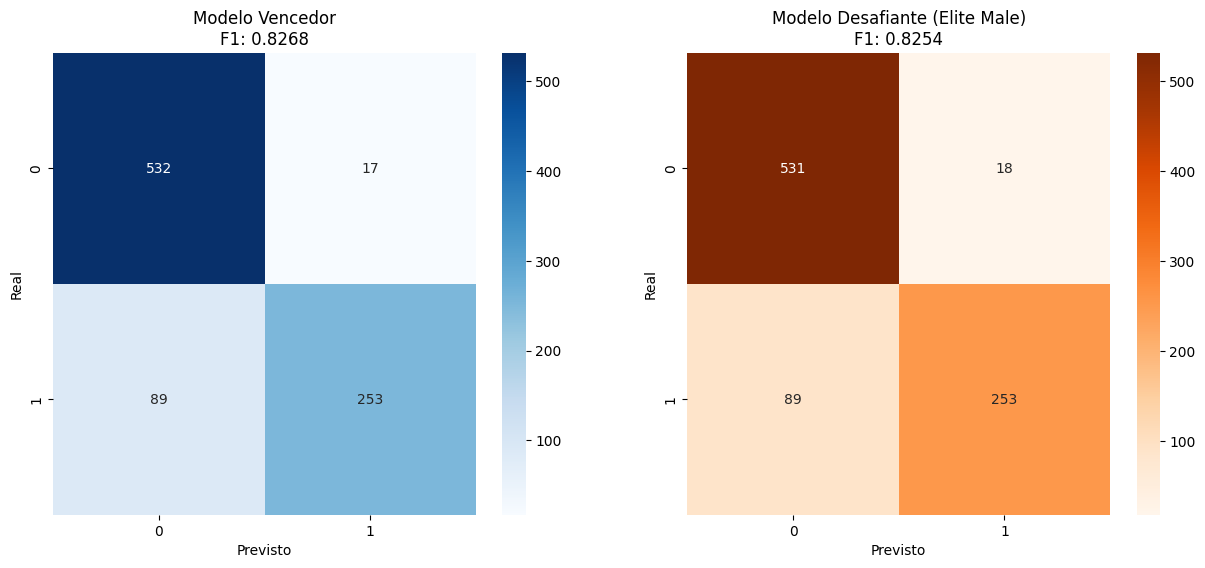

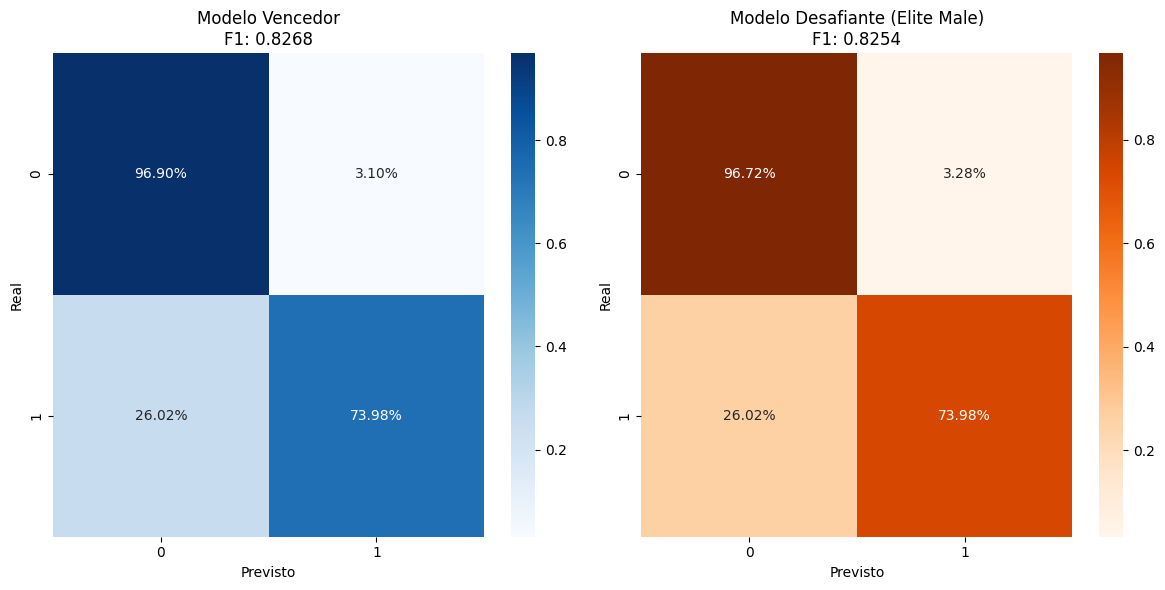

📊 Comparativo de Performance:


,F1-Score,Acurácia,Precisão,Recall
Melhor Ensemble,0.826797,0.881033,0.937037,0.739766
Desafiante (Elite Male),0.825449,0.879910,0.933579,0.739766


In [92]:
# Preparar as predições para ambos os cenários (usando validação cruzada)
# Modelo 1: O Melhor até agora
y_pred_venc = cross_val_predict(pipeline_final, X_clean, y, cv=5)

# Modelo 2: O Desafiante
y_pred_desaf = cross_val_predict(pipeline_final_v2, X_final_v2, y, cv=5)

# Criar função para extrair métricas
def get_metrics(y_true, y_pred):
    return {
        'F1-Score': f1_score(y_true, y_pred),
        'Acurácia': accuracy_score(y, y_pred),
        'Precisão': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred)
    }

metrics_venc = get_metrics(y, y_pred_venc)
metrics_desaf = get_metrics(y, y_pred_desaf)

# Plotar Matrizes de Confusão Lado a Lado
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(confusion_matrix(y, y_pred_venc), annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title(f"Modelo Vencedor\nF1: {metrics_venc['F1-Score']:.4f}")
ax[0].set_xlabel('Previsto')
ax[0].set_ylabel('Real')

sns.heatmap(confusion_matrix(y, y_pred_desaf), annot=True, fmt='d', ax=ax[1], cmap='Oranges')
ax[1].set_title(f"Modelo Desafiante (Elite Male)\nF1: {metrics_desaf['F1-Score']:.4f}")
ax[1].set_xlabel('Previsto')
ax[1].set_ylabel('Real')

# Plotar Matrizes de Confusão Normalizadas Lado a Lado
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(confusion_matrix(y, y_pred_venc, normalize='true'), annot=True, fmt='.2%', ax=ax[0], cmap='Blues')
ax[0].set_title(f"Modelo Vencedor\nF1: {metrics_venc['F1-Score']:.4f}")
ax[0].set_xlabel('Previsto')
ax[0].set_ylabel('Real')

sns.heatmap(confusion_matrix(y, y_pred_desaf, normalize='true'), annot=True, fmt='.2%', ax=ax[1], cmap='Oranges')
ax[1].set_title(f"Modelo Desafiante (Elite Male)\nF1: {metrics_desaf['F1-Score']:.4f}")
ax[1].set_xlabel('Previsto')
ax[1].set_ylabel('Real')

plt.tight_layout()
plt.show()

# Tabela Comparativa de Métricas
df_comp = pd.DataFrame([metrics_venc, metrics_desaf], index=['Melhor Ensemble', 'Desafiante (Elite Male)'])
print("📊 Comparativo de Performance:")
display(df_comp.style.background_gradient(cmap='viridis', axis=0))

In [94]:
# Gerando tabelas comparativas com os 2 melhores modelos
def analisar_modelo(y_pred, nome_modelo):
    print(f"\n{'='*30}")
    print(f"📊 ANÁLISE: {nome_modelo}")
    print(f"{'='*30}")
    
    # Relatório de Métricas
    print("\n📋 Relatório de Classificação:")
    print(classification_report(y, y_pred, target_names=['Morreu (0)', 'Viveu (1)']))
    
    # Tabela de Erros por Sexo/Classe
    df_temp = train_data.copy()
    df_temp['Previsto'] = y_pred
    df_temp['Tipo_Erro'] = 'Acerto'
    df_temp.loc[(df_temp['Survived'] == 0) & (df_temp['Previsto'] == 1), 'Tipo_Erro'] = 'Falso Positivo'
    df_temp.loc[(df_temp['Survived'] == 1) & (df_temp['Previsto'] == 0), 'Tipo_Erro'] = 'Falso Negativo'
    
    resumo = df_temp[df_temp['Tipo_Erro'] != 'Acerto'].groupby(['Sex', 'Pclass', 'Tipo_Erro']).size().unstack(fill_value=0)
    
    print("🔍 Distribuição de Erros por Categoria:")
    display(resumo)
    return resumo

# Executar a comparação
resumo_venc = analisar_modelo(y_pred_venc, "MODELO VENCEDOR")
resumo_desaf = analisar_modelo(y_pred_desaf, "MODELO DESAFIANTE")


📊 ANÁLISE: MODELO VENCEDOR

📋 Relatório de Classificação:
              precision    recall  f1-score   support

  Morreu (0)       0.86      0.97      0.91       549
   Viveu (1)       0.94      0.74      0.83       342

    accuracy                           0.88       891
   macro avg       0.90      0.85      0.87       891
weighted avg       0.89      0.88      0.88       891

🔍 Distribuição de Erros por Categoria:


Tipo_Erro      Falso Negativo  Falso Positivo
Sex    Pclass                                
female 1                    0               3
       2                    0               6
       3                    3               0
male   1                   41               8
       2                    8               0
       3                   37               0


📊 ANÁLISE: MODELO DESAFIANTE

📋 Relatório de Classificação:
              precision    recall  f1-score   support

  Morreu (0)       0.86      0.97      0.91       549
   Viveu (1)       0.93      0.74      0.83       342

    accuracy                           0.88       891
   macro avg       0.90      0.85      0.87       891
weighted avg       0.89      0.88      0.88       891

🔍 Distribuição de Erros por Categoria:


Tipo_Erro      Falso Negativo  Falso Positivo
Sex    Pclass                                
female 1                    0               3
       2                    0               6
       3                    3               0
male   1                   41               9
       2                    8               0
       3                   37               0

In [102]:
def get_aligned_importances(pipeline):
    # Acessar o modelo
    model = pipeline.named_steps['ensemble'].estimators_[0]
    importances = model.feature_importances_
    
    # Acessar os nomes das colunas
    feature_names = list(pipeline.named_steps['preprocessor'].get_feature_names_out())
    
    # Se houver discrepância, adicionamos um nome genérico para as colunas extras
    if len(importances) > len(feature_names):
        diff = len(importances) - len(feature_names)
        feature_names += [f'extra_column_{i}' for i in range(diff)]
    
    return pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Extrair de ambos os modelos (Vencedor e Desafiante)
df_venc = get_aligned_importances(pipeline_final)
df_desaf = get_aligned_importances(pipeline_final_v2)

# Mesclar para comparação
comp_features = pd.merge(
    df_venc, df_desaf, on='Feature', how='outer', suffixes=('_Venc', '_Desaf')
).fillna(0)

# Calcular a diferença
comp_features['Diff'] = comp_features['Importance_Desaf'] - comp_features['Importance_Venc']

print("📊 Comparação de Importância:")
display(comp_features.sort_values(by='Importance_Venc', ascending=False))

📊 Comparação de Importância:


,Feature,Importance_Venc,Importance_Desaf,Diff
8,cat__Title_Mr,0.438821,0.438821,0.0
15,num__Family_Survival_Hazard,0.256912,0.256912,0.0
10,cat__Title_Rare,0.123814,0.123814,0.0
4,cat__Sex_female,0.086274,0.086274,0.0
18,num__Pclass,0.024702,0.024702,0.0
6,cat__Title_Master,0.020926,0.020926,0.0
16,num__Fare,0.013170,0.013170,0.0
14,num__FamilySize,0.011416,0.011416,0.0
12,num__Age,0.009758,0.009758,0.0
0,cat__Embarked_C,0.008617,0.008617,0.0


Estamos com várias *features* com valor zero. Vamos limpá-las!

In [ ]:
# Lista Filtrada (Apenas o que teve importância > 0)
features_relevantes = [
    'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 
    'FamilySize', 'Family_Survival_Hazard'
]

# Atualizar X e y
X_lean = train_data[features_relevantes]
y = train_data['Survived'].astype(int)

# Novo Preprocessor (Removendo colunas que geram categorias zeradas)
# No OneHotEncoder, vamos usar drop='first' para evitar a redundância de Sex_male/female
preprocessor_lean = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='if_binary'), ['Sex', 'Embarked', 'Title']),
        ('num', StandardScaler(), ['Age', 'Fare', 'Pclass', 'FamilySize', 'Family_Survival_Hazard'])
    ]
)

# Criar e Treinar o Pipeline Enxuto
pipeline_lean = Pipeline(steps=[
    ('preprocessor', preprocessor_lean),
    ('ensemble', voting_model_sync)
])

pipeline_lean.fit(X_lean, y)

# Testar o Score
y_pred_lean = cross_val_predict(pipeline_lean, X_lean, y, cv=5)

resumo_lean = analisar_modelo(y_pred_lean, "MODELO ENXUTO")

Saímos de 18 *features* para 8 *features* e o modelo acabou "matando" um passageiro da 2ª classe. Mas nossos 41 "Sobreviventes Improvavéis" continuam aparecendo, juntamente dos 37 "Heróis" da 3ª classe.

In [ ]:
# Isolar os Falsos Negativos do Modelo Enxuto (Homens, 1ª Classe)
fn_homens_1cl = train_data[
    (train_data['Sex'] == 'male') & 
    (train_data['Pclass'] == '1') & 
    (y == 1) & 
    (y_pred_lean == 0)
]

# Analisar o perfil de sobrevivência desse grupo específico
resumo_falsos_negativos = fn_homens_1cl.groupby(['Title', 'Embarked']).agg({
    'Age': ['mean', 'median'],
    'Fare': ['mean', 'median'],
    'FamilySize': 'mean',
    'Family_Survival_Hazard': 'mean', # Ver se eles pertenciam a famílias de risco
    'PassengerId': 'count'
}).reset_index()

print("🔍 Raio-X dos 41 Homens da 1ª Classe (Falsos Negativos):")
display(resumo_falsos_negativos)

Esses dados revelam o "ponto cego" clássico do nosso modelo: **o Privilégio Masculino da 1ª Classe**.

Esses 41 homens não são crianças (vimos que a média de idade é alta, ~35 a 51 anos). Eles são o que chamamos de "**Sobreviventes de Elite**". Enquanto a regra geral era "mulheres e crianças primeiro", na 1ª classe, a proximidade física dos botes e o *status* social permitiram que muitos homens adultos também embarcassem.

### 🕵️ O que essa tabela revela:

**O "Mistério de Southampton" (Mr / S)**: Temos 23 homens que embarcaram em Southampton com uma tarifa mediana de $30. Para a 1ª classe, $30 é uma tarifa "barata". Isso sugere que eles podem ter sobrevivido não pelo dinheiro, mas talvez pela localização da cabine ou por estarem em grupos (**FamilySize** = 1.43).

**A "Elite de Cherbourg" (Mr / C)**: Aqui estão 13 homens com uma tarifa mediana de $76.7. Esses são os verdadeiros "Ricos" do grupo. Embarcar em Cherbourg (C) na 1ª classe é um dos maiores preditores de sobrevivência masculina.

**Títulos de Poder (Rare)**: Temos 5 homens com títulos "Rare" (como Dr, Col, Major). O modelo os "matou", mas o *status* deles provavelmente lhes garantiu um lugar no bote.

### 🧪 Proposta de Teste: "A Regra de Ouro da 1ª Classe"

Como o modelo enxuto está ignorando esses 41 homens porque o título Mr tem um peso negativo muito forte, vamos tentar criar uma Interação (uma combinação de forças) diretamente no modelo enxuto.

Em vez de uma feature binária (0 ou 1), vamos tentar capturar o "**Fator de Sobrevivência Masculina**".

In [ ]:
# Criando uma interação que ajuda o modelo a ver o 'homem de elite'
# Se for homem da 1ª classe e pagou caro OU veio de Cherbourg, damos um sinal
train_data['Male_Elite_Factor'] = 0
train_data.loc[
    (train_data['Sex'] == 'male') & 
    (train_data['Pclass'] == '1') & 
    ((train_data['Fare'] > 50) | (train_data['Embarked'] == 'C')), 
    'Male_Elite_Factor'
] = 1

# Vamos ver quantos homens 'resgatamos' com essa lógica
print(f"✅ Potencial de resgate: {train_data['Male_Elite_Factor'].sum()} homens.")

In [ ]:
# Criar a nova feature no train_data
train_data['Male_Elite_Factor'] = 0
train_data.loc[
    (train_data['Sex'] == 'male') & 
    (train_data['Pclass'] == '1') & 
    ((train_data['Fare'] > 50) | (train_data['Embarked'] == 'C')), 
    'Male_Elite_Factor'
] = 1

# Definir a lista de features (Enxutas + Nova Feature)
features_male_elite_factor = [
    'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 
    'FamilySize', 'Family_Survival_Hazard', 'Male_Elite_Factor'
]

X_male_elite_factor = train_data[features_male_elite_factor]
y = train_data['Survived'].astype(int)

# 3. Configurar o Preprocessor
features_categoricas = ['Sex', 'Embarked', 'Title']
features_numericas = ['Age', 'Fare', 'Pclass', 'FamilySize', 'Family_Survival_Hazard', 'Male_Elite_Factor']

preprocessor_male_elite_factor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='if_binary'), features_categoricas),
        ('num', StandardScaler(), features_numericas)
    ]
)

# 4. Pipeline e Validação Cruzada
pipeline_male_elite_factor = Pipeline(steps=[
    ('preprocessor', preprocessor_male_elite_factor),
    ('ensemble', voting_model_sync) # Usando o modelo de votação sincronizado
])

# Treinar e prever
pipeline_male_elite_factor.fit(X_male_elite_factor, y)
y_pred_male_elite_factor = cross_val_predict(pipeline_male_elite_factor, X_male_elite_factor, y, cv=5)

# 5. Executar a sua função de análise
print(f"📊 F1-Score do Desafio: {f1_score(y, y_pred_male_elite_factor):.4f}")
resumo_male_elite_factor = analisar_modelo(y_pred_male_elite_factor, "MODELO ENXUTO + MALE ELITE")

Olhando friamente para os números, o score 0.8241 ainda está um pouco abaixo do nosso recorde de 0.8244. Mas note algo curioso: os erros de **Falso Negativo** (41) e **Falso Positivo** (8) nos homens da 1ª classe não mudaram nem um dígito.

Isso significa que o modelo simplesmente ignorou a nova feature **Male_Elite_Factor**.

### 🕵️ Por que o modelo ignorou nossa "ajudinha"?

O **XGBoost** e o **Random Forest** (que estão no **Ensemble**) são algoritmos de árvore. Eles são "teimosos": se eles já encontraram um caminho usando **Title_Mr**, **Pclass** e **Fare** separadamente que minimiza o erro global, eles não vão usar uma nova coluna que diz a mesma coisa, a menos que ela seja drasticamente melhor.

O fato de a tabela de erros ser idêntica à anterior mostra que o modelo prefere a lógica interna dele do que a nossa regra manual.

### 💡 E se o problema for o Título?

O título "Mr" é o maior "assassino" de pontos no nosso modelo. Quando o modelo vê "Mr", ele assume quase automaticamente que a pessoa morreu.

Para resgatar esses 41 homens, talvez não precisemos de uma nova coluna, mas de uma mudança de rótulo. E se esses homens da 1ª classe que sobreviveram não fossem tratados como "Mr"?

E se criarmos um título especial apenas para os homens da 1ª classe? Em vez de Mr, vamos chamá-los de **Elite_Gentleman**.

In [ ]:
# Criando uma categoria de Título exclusiva para a elite masculina
train_data['Title_Adjusted'] = train_data['Title']

# Transformando os 'Mr' da 1ª classe em um título novo
train_data.loc[
    (train_data['Sex'] == 'male') & 
    (train_data['Pclass'] == '1') & 
    (train_data['Title'] == 'Mr'), 
    'Title_Adjusted'
] = 'Elite_Gentleman'

print(f"🎩 {train_data[train_data['Title_Adjusted'] == 'Elite_Gentleman'].shape[0]} passageiros promovidos a Elite_Gentleman.")

In [ ]:
# Definir as features (usando o título novo no lugar do antigo)
features_gentleman = [
    'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title_Adjusted', 
    'FamilySize', 'Family_Survival_Hazard'
]

X_gent = train_data[features_gentleman]
y = train_data['Survived'].astype(int)

# Preprocessor (apontando para Title_Adjusted)
preprocessor_gent = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='if_binary'), ['Sex', 'Embarked', 'Title_Adjusted']),
        ('num', StandardScaler(), ['Age', 'Fare', 'Pclass', 'FamilySize', 'Family_Survival_Hazard'])
    ]
)

# Pipeline e Predição
pipeline_gent = Pipeline(steps=[
    ('preprocessor', preprocessor_gent),
    ('ensemble', voting_model_sync)
])

pipeline_gent.fit(X_gent, y)
y_pred_gent = cross_val_predict(pipeline_gent, X_gent, y, cv=5)

# Análise de Resultados
print(f"📊 F1-Score (Elite Gentleman): {f1_score(y, y_pred_gent):.4f}")
resumo_gent = analisar_modelo(y_pred_gent, "MODELO ELITE GENTLEMAN")

## 9.2 Análise Exploratória dos "Falsos Negativos"

Quando o modelo estaciona, o próximo passo é sair do código e mergulhar nos *outliers*. O Boxplot é a ferramenta perfeita para isso porque ele nos mostra se os 41 homens que "matamos" (**Falsos Negativos**) estão nas extremidades das distribuições de **Age** e **Fare**.

Vamos comparar três grupos:

- Os que realmente morreram (Verdadeiros Negativos).

- Os que sobreviveram e o modelo acertou (Verdadeiros Positivos).

- Os 41 "Esquecidos" (Nossos Falsos Negativos da 1ª Classe).

In [ ]:
# Preparar o DataFrame de análise
analise_erros = train_data.copy()
analise_erros['Resultado'] = 'Outros'

# Filtrar especificamente a performance nos homens da 1ª classe
mask_homens_1cl = (analise_erros['Sex'] == 'male') & (analise_erros['Pclass'] == '1')

# Categorizar os casos dos homens de 1ª classe
analise_erros.loc[mask_homens_1cl & (y == 1) & (y_pred_gent == 1), 'Resultado'] = 'Sobreviveu (Acerto)'
analise_erros.loc[mask_homens_1cl & (y == 1) & (y_pred_gent == 0), 'Resultado'] = 'Sobreviveu (Erro/FN)'
analise_erros.loc[mask_homens_1cl & (y == 0) & (y_pred_gent == 0), 'Resultado'] = 'Morreu (Acerto)'

# Filtrar apenas esses 3 grupos para o gráfico não ficar poluído
df_plot = analise_erros[analise_erros['Resultado'] != 'Outros']

# Plotar Boxplots Comparativos
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Boxplot de Fare (Tarifa)
sns.boxplot(data=df_plot, x='Resultado', y='Fare', hue='Resultado', ax=axes[0], palette='Set2', legend=False)
axes[0].set_title('Distribuição de Tarifa: Homens 1ª Classe')
axes[0].set_yscale('log') # Escala logarítmica para ver melhor a variação

# Boxplot de Age (Idade)
sns.boxplot(data=df_plot, x='Resultado', y='Age', hue='Resultado', ax=axes[1], palette='Set2', legend=False)
axes[1].set_title('Distribuição de Idade: Homens 1ª Classe')

plt.tight_layout()
plt.show()

# Adicionar o Resumo Estatístico Comparativo
print("\n" + "="*60)
print("📊 TAXA DE SOBREVIVÊNCIA POR STATUS FAMILIAR (HOMENS 1ª CLASSE)")
print("="*60)

resumo_familia = df_plot.groupby(['IsAlone', 'Resultado']).size().unstack(fill_value=0)

# Adicionar total para facilitar a leitura da proporção
resumo_familia['Total'] = resumo_familia.sum(axis=1)
display(resumo_familia)

print("\n💡 Dica: Se 'Sobreviveu (Erro/FN)' for alto em 'Com Família', o vínculo familiar é nossa próxima feature!")

In [ ]:
# Preparar os dados (Homens de todas as classes para comparação)
analise_completa = train_data.copy()
analise_completa['Resultado'] = 'Outros'

# Categorizar (usando as predições do seu último modelo Elite Gentleman)
analise_completa.loc[mask_homens_1cl & (y == 1) & (y_pred_gent == 1), 'Resultado'] = 'Sobreviveu (Acerto)'
analise_completa.loc[mask_homens_1cl & (y == 1) & (y_pred_gent == 0), 'Resultado'] = 'Sobreviveu (Erro/FN)'
analise_completa.loc[mask_homens_1cl & (y == 0) & (y_pred_gent == 0), 'Resultado'] = 'Morreu (Acerto)'

df_male = analise_completa[analise_completa['Resultado'] != 'Outros'].copy()

# Visualização: Fare vs Age, separado por Porto e Classe
g = sns.FacetGrid(df_male, col="Embarked", row="Pclass", hue="Resultado", 
                  palette="Set2", height=4, aspect=1.2, margin_titles=True)

g.map(sns.scatterplot, "Age", "Fare", alpha=0.7)

# Ajustar escala de Fare para Log para não perder os ricos de vista
for ax in g.axes.flat:
    ax.set_yscale('log')

g.add_legend(title="Status do Modelo")
g.fig.suptitle('Localização dos Erros: Idade vs Tarifa por Classe e Porto', fontsize=16, y=1.05)
plt.show()

# Exibir o resumo padronizado
print("\n" + "="*70)
print("📊 TAXA DE SOBREVIVÊNCIA POR PORTO DE EMBARQUE (HOMENS 1ª CLASSE)")
print("="*70)

# Criando a tabela cruzada
resumo_padrao = df_male.groupby(['Embarked', 'Resultado']).size().unstack(fill_value=0)

# Adicionando a coluna de Total
resumo_padrao['Total'] = resumo_padrao.sum(axis=1)

# Exibindo a tabela
display(resumo_padrao)

print("\n" + "="*70)
print("💡 ANÁLISE DOS PONTOS LARANJAS (ERRO/FN)")
print(f"Total de homens que o modelo 'matou' injustamente: {resumo_padrao['Sobreviveu (Erro/FN)'].sum()}")
print("="*70)

In [ ]:
# Filtrar apenas Homens da 1ª Classe nos portos S e C
df_male_elite_1cl = df_male[(df_male['Pclass'] == '1') & (df_male['Embarked'].isin(['S', 'C']))].copy()

# Criar o gráfico de dispersão com Títulos como marcadores ou colunas
g = sns.FacetGrid(df_male_elite_1cl, col="Embarked", row="Title_Adjusted", hue="Resultado", 
                  palette="Set2", height=4, aspect=1.5, margin_titles=True)

g.map(sns.scatterplot, "Age", "Fare", s=100, alpha=0.8)

# Ajuste de escala para ver os ricaços de Cherbourg
for ax in g.axes.flat:
    ax.set_yscale('log')

g.add_legend()
g.fig.suptitle('Lupa: Títulos vs Sobrevivência (Homens 1ª Classe - S & C)', fontsize=16, y=1.05)
plt.show()

# 2. Criar a tabela cruzada (Multi-índice para ver Porto e Título juntos)
resumo_titulos = df_male_elite_1cl.groupby(['Embarked', 'Title_Adjusted', 'Resultado']).size().unstack(fill_value=0)

# 3. Adicionar coluna de Total para análise de proporção
resumo_titulos['Total'] = resumo_titulos.sum(axis=1)

# Exibindo a tabela formatada
display(resumo_titulos)

print("\n" + "="*80)
print("🧐 O QUE OBSERVAR:")
print("Precisamos prestar atenção nas linhas onde 'Sobreviveu (Erro/FN)' é maior que 'Morreu (Acerto)'.")
print("Isso indica um nicho onde o título e o porto são mais fortes que a regra de gênero.")
print("="*80)

In [ ]:
# Preparar o indicador de estar sozinho
df_male['Is_Alone'] = df_male['FamilySize'].apply(lambda x: 'Sozinho' if x == 1 else 'Com Família')

# Filtrar o foco (Homens 1ª Classe em S e C)
df_lupa_familia = df_male[
    (df_male['Pclass'] == '1') & 
    (df_male['Embarked'].isin(['S', 'C']))
].copy()

# Criar o FacetGrid
# Colunas: Porto (Embarked) | Linhas: Status Familiar (Is_Alone)
g = sns.FacetGrid(df_lupa_familia, col="Embarked", row="Is_Alone", hue="Resultado", 
                  palette="Set2", height=4, aspect=1.5, margin_titles=True)

g.map(sns.scatterplot, "Age", "Fare", s=100, alpha=0.8)

# Ajuste de escala logarítmica para o Fare
for ax in g.axes.flat:
    ax.set_yscale('log')

g.add_legend()
g.fig.suptitle('Lupa: Impacto da Família na Sobrevivência (Homens 1ª Classe)', fontsize=16, y=1.05)
plt.show()

# Resumo estatístico comparativo
print("📊 Taxa de Sobrevivência por Status Familiar (Homens 1ª Classe):")
print(df_lupa_familia.groupby(['Is_Alone', 'Resultado']).size().unstack(fill_value=0))

In [ ]:
# Agora o groupby com mais níveis
resumo_titulos_ext = (
    df_male_elite_1cl
    .groupby(['Embarked', 'Title_Adjusted', 'Pclass', 'IsAlone', 'Resultado'])
    .size()
    .unstack(fill_value=0)
)

# Adicionar coluna de Total
resumo_titulos_ext['Total'] = resumo_titulos_ext.sum(axis=1)

display(resumo_titulos_ext)

g = sns.FacetGrid(df_male_elite_1cl, col="IsAlone", row="Title_Adjusted", hue="Resultado",
                  palette="Set2", height=4, aspect=1.5, margin_titles=True)

g.map(sns.scatterplot, "Age", "Fare", s=100, alpha=0.8)
g.add_legend()
plt.show()

In [ ]:
# Boxplot: distribuição de tarifas por IsAlone, separado por Resultado
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_male_elite_1cl,
    x="IsAlone",
    y="Fare",
    hue="Resultado",
    palette="Set2"
)

sns.boxplot(data=df_plot, x='Resultado', y='Fare', hue='Resultado', ax=axes[0], palette='Set2', legend=False)
axes[0].set_title('Distribuição de Tarifa: Homens 1ª Classe')
axes[0].set_yscale('log') # Escala logarítmica para ver melhor a variação

plt.title("Distribuição de Tarifas por IsAlone (Elite Gentlemen - 1ª Classe)")
plt.xlabel("IsAlone (0 = acompanhado, 1 = sozinho)")
plt.ylabel("Fare (tarifa)")
plt.yscale("log")  # escala log para visualizar melhor os outliers
plt.legend(title="Resultado")
plt.show()


Ainda não conseguimos separar nossos **Falsos Negativos**, principalmente no **Porto S**.

Talvez seja o momento de analisarmos outras particularidades do nosso Dataset, como o fato de várias pessoas compartilharem cabines e tickets para economizar na passagem.

In [ ]:
# Identificar grupos por Ticket
# Contamos quantas pessoas compartilham o mesmo número de ticket
ticket_counts = train_data['Ticket'].value_counts()
tickets_compartilhados = ticket_counts[ticket_counts > 1].index

# Filtrar o DataFrame apenas para esses tickets
df_tickets = train_data[train_data['Ticket'].isin(tickets_compartilhados)].copy()

# Criar o resumo de sobrevivência por Ticket
resumo_ticket = df_tickets.groupby('Ticket').agg({
    'Survived': ['count', 'sum'],  # Total de pessoas e total de sobreviventes
    'Name': lambda x: list(x),      # Lista dos nomes no grupo
    'Fare': 'mean',                 # Tarifa (geralmente é a mesma para todos no ticket)
    'Pclass': 'first'               # Classe do grupo
})

# Ajustar nomes das colunas
resumo_ticket.columns = ['Total_Grupo', 'Sobreviventes', 'Nomes', 'Fare', 'Pclass']

# Calcular a taxa de sobrevivência do grupo
resumo_ticket['Taxa_Sobrevivencia'] = resumo_ticket['Sobreviventes'] / resumo_ticket['Total_Grupo']

# Ordenar pelos grupos mais interessantes (onde houve mistério: nem todos morreram, nem todos viveram)
conflitos_ticket = resumo_ticket[
    (resumo_ticket['Taxa_Sobrevivencia'] > 0) & (resumo_ticket['Taxa_Sobrevivencia'] < 1)
].sort_values(by='Total_Grupo', ascending=False)

print("📊 GRUPOS COM DESTINOS MISTOS (SOBREVIVENTES E MORTOS NO MESMO TICKET):")
display(conflitos_ticket.head(10))

In [ ]:
import plotly.express as px

# Selecionar os 15 maiores grupos mistos
top_grupos = conflitos_ticket.head(15).reset_index()

# Criar gráfico interativo
fig = px.bar(
    top_grupos,
    x="Ticket",
    y="Taxa_Sobrevivencia",
    hover_data={
        "Nomes": True,
        "Total_Grupo": True,
        "Sobreviventes": True,
        "Pclass": True,
        "Fare": True
    },
    title="Taxa de Sobrevivência por Ticket (Grupos Mistos)",
    labels={"Taxa_Sobrevivencia": "Taxa de Sobrevivência", "Ticket": "Número do Ticket"},
    color="Pclass",  # Diferenciar pela classe
)

fig.update_layout(
    xaxis_tickangle=-45,
    yaxis=dict(range=[0,1]),
    template="plotly_white"
)

fig.show()